In [2]:
import numpy as np
import matplotlib.pyplot as plt
import L1_Norm_TTD_AltConvPro
import TTD
import utils
import numpy as np
from copy import deepcopy
import pandas as pd

# $\text{Comparative Analysis}$

## $\text{Experiment 1: Outlier Analysis and Sparsity - Tensor Case}$

In [13]:
# np.random.seed(0)
# Size of tensor
size = (10, 30, 20)
# Generate random tensor
X = np.random.randint(10, 20, size)
# Fraction of outliers as compared to total number of entries in the tensor
f_num_out = [0, 0.1, 0.2, 0.3]
num_out = [int(f * np.prod(size)) for f in f_num_out]

# TT-Ranks
r = [1]
for i in range(len(size)):
    temp = utils.MATLAB_reshape(X, (np.prod(size[:i+1]), -1))
    r.append(np.linalg.matrix_rank(temp))
compression = False

# Reducing TT-Ranks (new_rank = comp_rat * TT_rank)
# Comment this block to use original TT-Ranks
comp_rat = 0.3
for i in range(1, len(r)-1):
    r[i] = int(comp_rat * r[i])
compression = True
assert all([r[i] >= 1 for i in range(1, len(r)-1)])

# Print General Information
print(f"\nTensor Size: {size}")
print(f"TT-Ranks: {r}")
print(F"Number of Entries in Original Tensor: {np.prod(size)}")
print(f"Total Number of Entries in TT-Cores after Compression: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}" if compression else f"Total Number of Entries in TT-Cores: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}")
print(f"Frobenius Norm of Original Tensor: {np.linalg.norm(X)}")

# Run for different number of outliers
for iter, num in enumerate(num_out):
    print(f"\n         Number of outliers (frac = {f_num_out[iter]}): {num}\n")

    # X_hat = corrupted tensor with outliers 
    X_hat = deepcopy(X)

    # Add outliers uniformly at random
    if num != 0:
        f_indices = np.random.randint(0, np.prod(size), num)
        for i in f_indices:
            X_hat[np.unravel_index(i, size)] = np.random.randint(100, 200) * np.random.choice([-1, 1])

    print(f"Frobenius Norm of Corrupted Tensor: {np.linalg.norm(X_hat)}")
    # L1_Norm_TTD_AltConvPro
    print("\n############ L1_Norm_TTD_AltConvPro ############\n")
    G, losses, t = L1_Norm_TTD_AltConvPro.L1_TTD_AltConvPro(X_hat, ranks=r)
    print(f"Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))}")
    print(f"Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))}")
    print(f"Max, Min: ", max([np.max(g.ravel()) for g in G]), min([np.min(g.ravel()) for g in G]))
    print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G])}")
    print(f"Time: {t}s")

    # TTD
    print("\n############ L2_Norm_TTD_TTSVD ############\n")
    G_list, r1, t = TTD.TTD(X_hat, ranks=r)
    X_reconstructed = TTD.TTD_reconstruct(G_list)
    print(f"Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - X_reconstructed)}")
    print(f"Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - X_reconstructed)}")
    print(f"Max, Min: ", max([np.max(g.ravel()) for g in G_list]), min([np.min(g.ravel()) for g in G_list]))
    print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G_list])}")
    print(f"Time: {t}s")


Tensor Size: (10, 30, 20)
TT-Ranks: [1, 3, 6, 1]
Number of Entries in Original Tensor: 6000
Total Number of Entries in TT-Cores after Compression: 690
Frobenius Norm of Original Tensor: 1141.606324439384

         Number of outliers (frac = 0): 0

Frobenius Norm of Corrupted Tensor: 1141.606324439384

############ L1_Norm_TTD_AltConvPro ############



 43%|████▎     | 13/30 [00:02<00:02,  5.74it/s]


Reconstruction Error (corrupted tensor):    229.9728259945765
Reconstruction Error (uncorrupted tensor):  229.9728259945765
Max, Min:  27.117391545451397 -1.3614467767275336
Number of close-to-zero values (tol = 1e-4):    31
Time: 12.396754741668701s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    204.65039138331073
Reconstruction Error (uncorrupted tensor):  204.65039138331073
Max, Min:  257.15171367615056 -15.864737021623041
Number of close-to-zero values (tol = 1e-4):    1
Time: 0.007938861846923828s

         Number of outliers (frac = 0.1): 600

Frobenius Norm of Corrupted Tensor: 3803.5015446296325

############ L1_Norm_TTD_AltConvPro ############



 43%|████▎     | 13/30 [00:02<00:02,  6.13it/s]


Reconstruction Error (corrupted tensor):    3605.0811900115777
Reconstruction Error (uncorrupted tensor):  907.4059602858714
Max, Min:  304.063421585921 -283.9639071136557
Number of close-to-zero values (tol = 1e-4):    11
Time: 12.063379526138306s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    3367.960714599613
Reconstruction Error (uncorrupted tensor):  1569.7293885190309
Max, Min:  379.2372331502098 -549.683357579967
Number of close-to-zero values (tol = 1e-4):    1
Time: 0.0s

         Number of outliers (frac = 0.2): 1200

Frobenius Norm of Corrupted Tensor: 5134.589078008094

############ L1_Norm_TTD_AltConvPro ############



 50%|█████     | 15/30 [00:02<00:02,  6.51it/s]


Reconstruction Error (corrupted tensor):    4873.7590556292835
Reconstruction Error (uncorrupted tensor):  1696.9291749616832
Max, Min:  298.5306798841285 -309.78118320887006
Number of close-to-zero values (tol = 1e-4):    6
Time: 3.810760498046875s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    4618.731697933965
Reconstruction Error (uncorrupted tensor):  2126.274194276305
Max, Min:  413.5448956042376 -476.21038524030735
Number of close-to-zero values (tol = 1e-4):    0
Time: 0.0s

         Number of outliers (frac = 0.3): 1800

Frobenius Norm of Corrupted Tensor: 6034.567093006755

############ L1_Norm_TTD_AltConvPro ############



 77%|███████▋  | 23/30 [00:04<00:01,  5.71it/s]

Reconstruction Error (corrupted tensor):    5786.998150738393
Reconstruction Error (uncorrupted tensor):  2146.2209519399626
Max, Min:  199.704864153442 -275.6967098314238
Number of close-to-zero values (tol = 1e-4):    6
Time: 5.5571863651275635s

############ L2_Norm_TTD_TTSVD ############

Reconstruction Error (corrupted tensor):    5467.120761179529
Reconstruction Error (uncorrupted tensor):  2643.3181123368686
Max, Min:  673.172913351325 -490.9041050278968
Number of close-to-zero values (tol = 1e-4):    0
Time: 0.0s


## $\text{Experiment 2: Outlier Analysis and Sparsity - Matrix Case}$

Number of outliers:  300


 10%|█         | 3/30 [00:00<00:07,  3.72it/s]


Number of outliers:  600


 13%|█▎        | 4/30 [00:00<00:06,  4.10it/s]


Number of outliers:  900


 17%|█▋        | 5/30 [00:01<00:05,  4.60it/s]


Number of outliers:  1200


 20%|██        | 6/30 [00:01<00:04,  4.85it/s]


Number of outliers:  1500


 33%|███▎      | 10/30 [00:01<00:03,  5.04it/s]


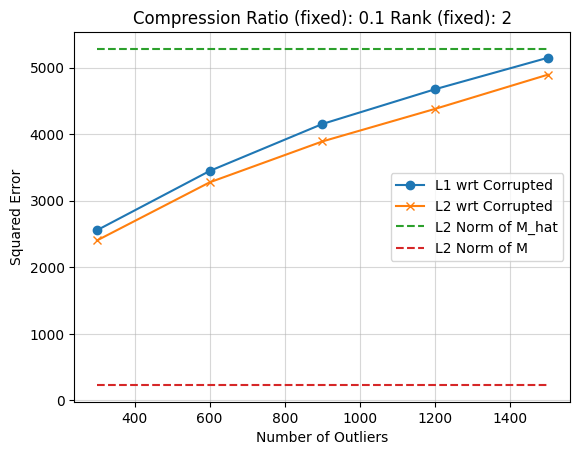

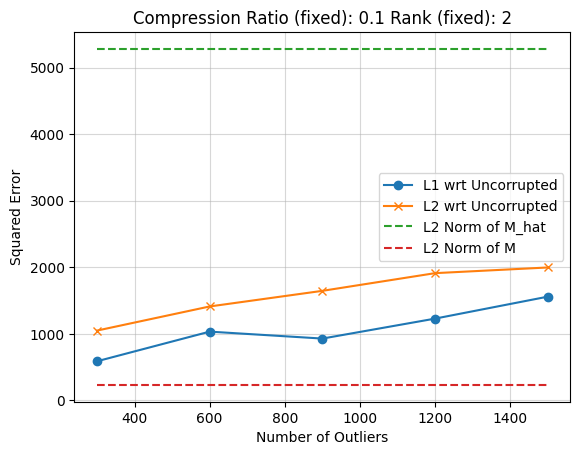

Number of outliers:  300


 33%|███▎      | 10/30 [00:02<00:05,  3.93it/s]


Number of outliers:  600


 63%|██████▎   | 19/30 [00:04<00:02,  4.21it/s]


Number of outliers:  900


 70%|███████   | 21/30 [00:04<00:01,  4.52it/s]


Number of outliers:  1200


 57%|█████▋    | 17/30 [00:03<00:02,  4.41it/s]


Number of outliers:  1500


 60%|██████    | 18/30 [00:04<00:02,  4.47it/s]


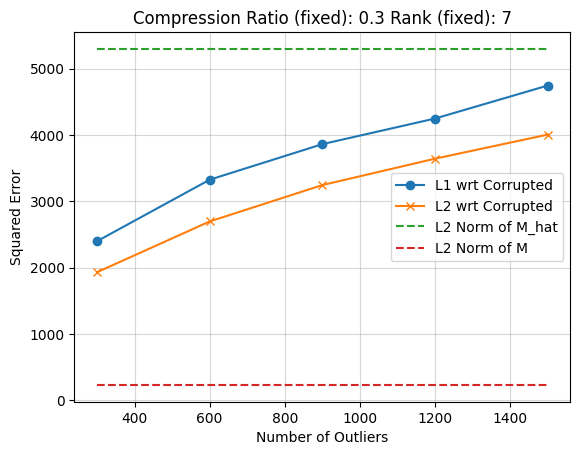

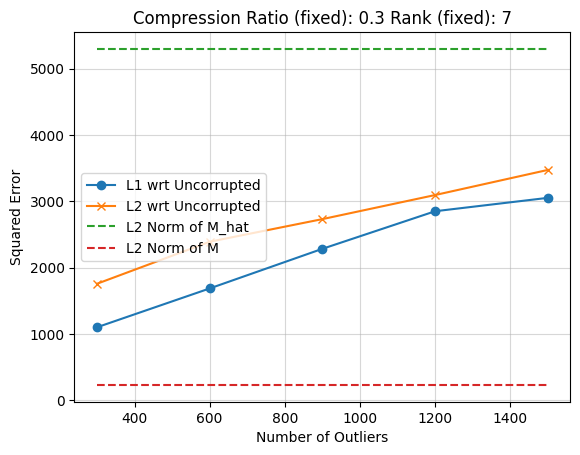

Number of outliers:  300


 33%|███▎      | 10/30 [00:02<00:05,  3.51it/s]


Number of outliers:  600


 13%|█▎        | 4/30 [00:01<00:08,  3.02it/s]


Number of outliers:  900


 37%|███▋      | 11/30 [00:02<00:04,  3.92it/s]


Number of outliers:  1200


 43%|████▎     | 13/30 [00:03<00:04,  3.98it/s]


Number of outliers:  1500


 20%|██        | 6/30 [00:01<00:06,  3.65it/s]


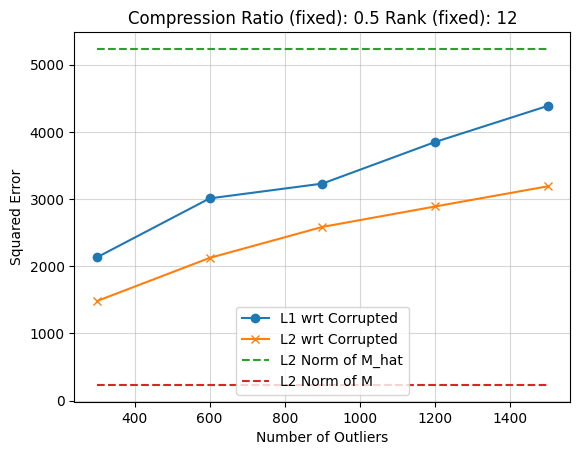

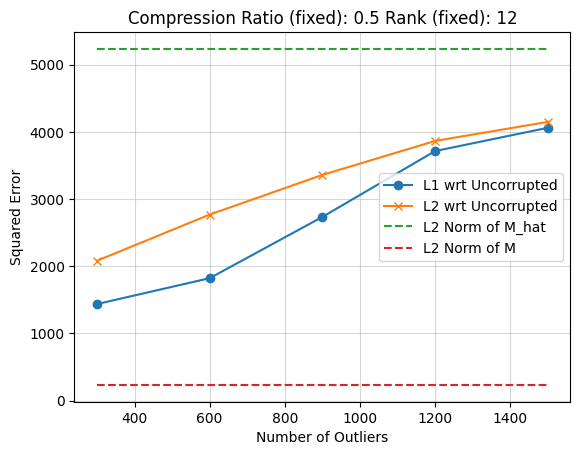

Number of outliers:  300


 47%|████▋     | 14/30 [00:03<00:04,  3.82it/s]


Number of outliers:  600


 53%|█████▎    | 16/30 [00:04<00:03,  3.77it/s]


Number of outliers:  900


 77%|███████▋  | 23/30 [00:05<00:01,  3.86it/s]


Number of outliers:  1200


 30%|███       | 9/30 [00:02<00:06,  3.47it/s]


Number of outliers:  1500


 23%|██▎       | 7/30 [00:01<00:06,  3.69it/s]


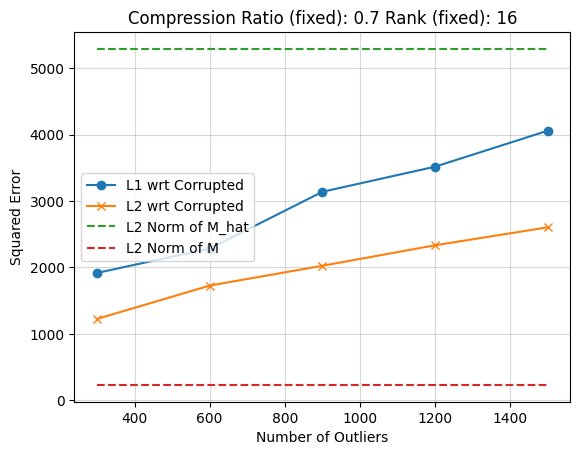

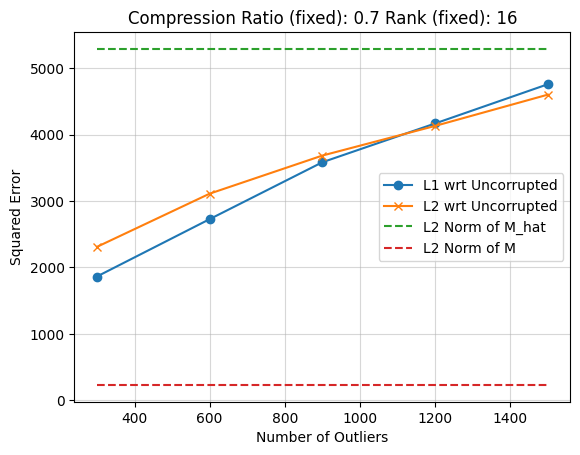

Number of outliers:  300


 30%|███       | 9/30 [00:02<00:05,  3.68it/s]


Number of outliers:  600


 20%|██        | 6/30 [00:01<00:07,  3.25it/s]


Number of outliers:  900


 27%|██▋       | 8/30 [00:02<00:06,  3.55it/s]


Number of outliers:  1200


 40%|████      | 12/30 [00:03<00:04,  3.64it/s]


Number of outliers:  1500


 43%|████▎     | 13/30 [00:03<00:04,  3.50it/s]


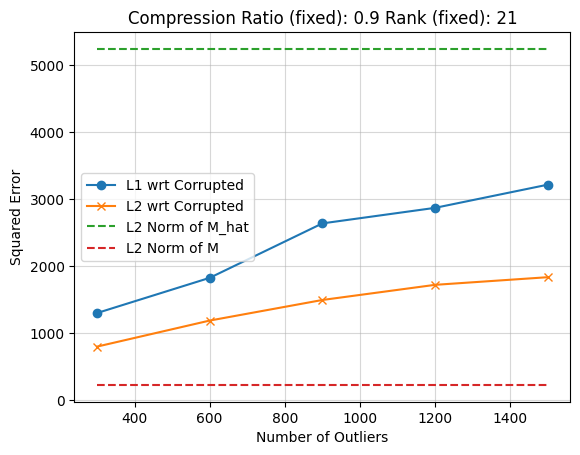

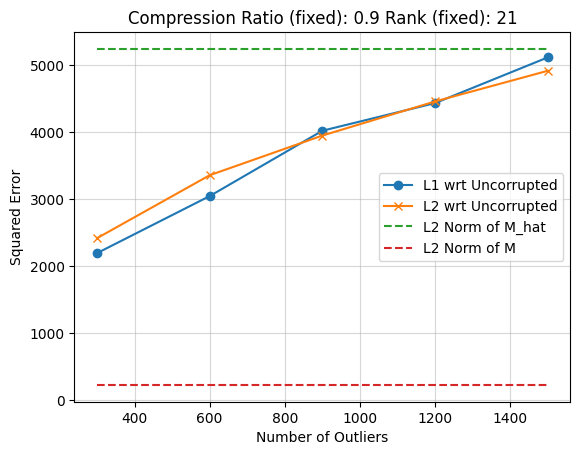

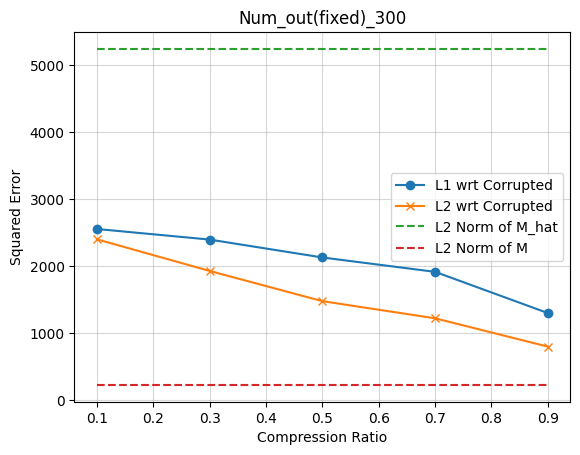

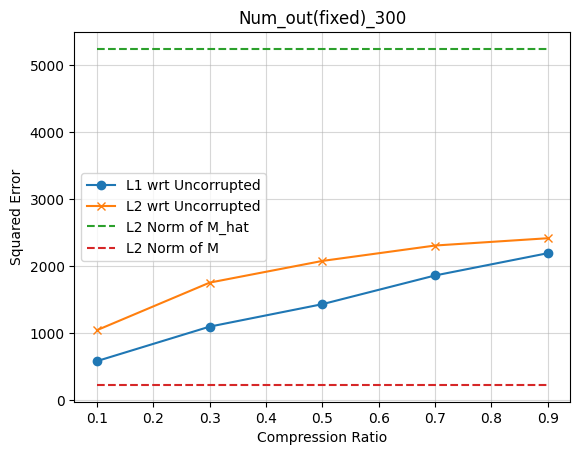

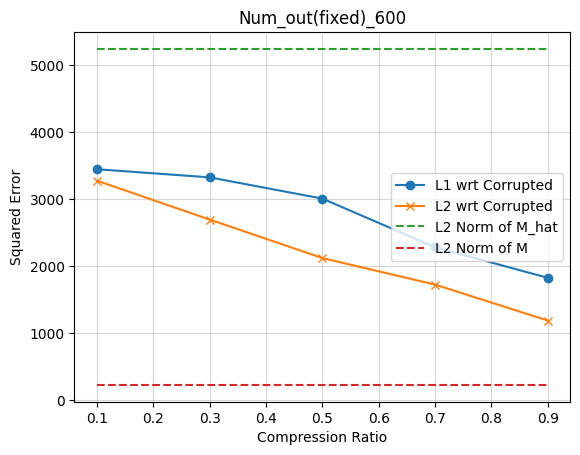

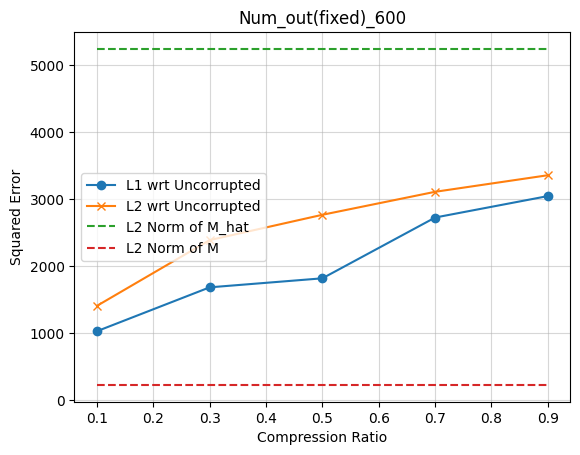

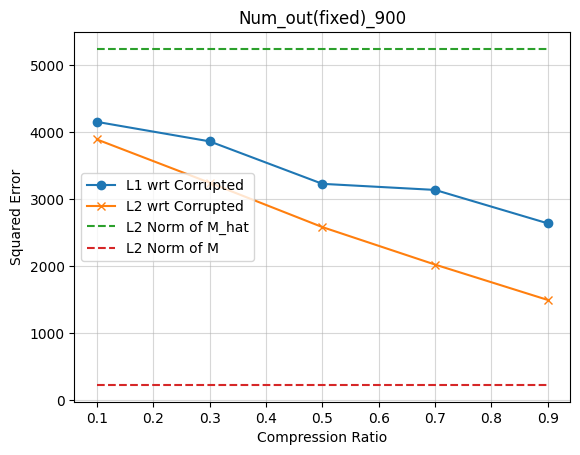

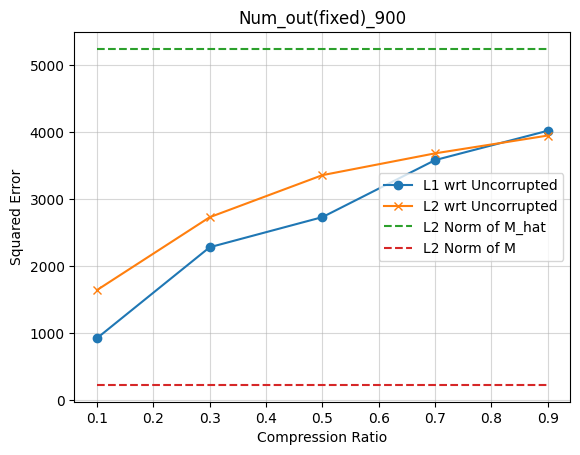

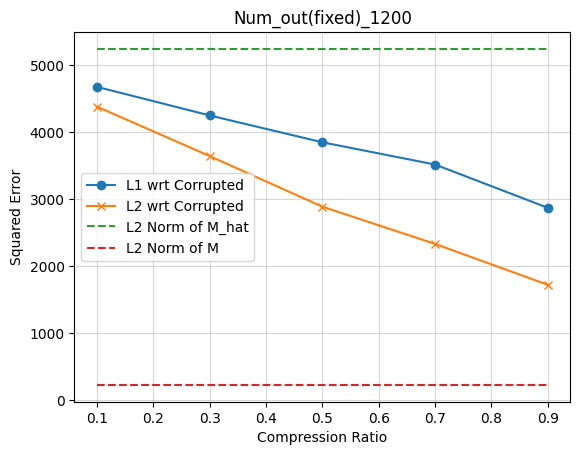

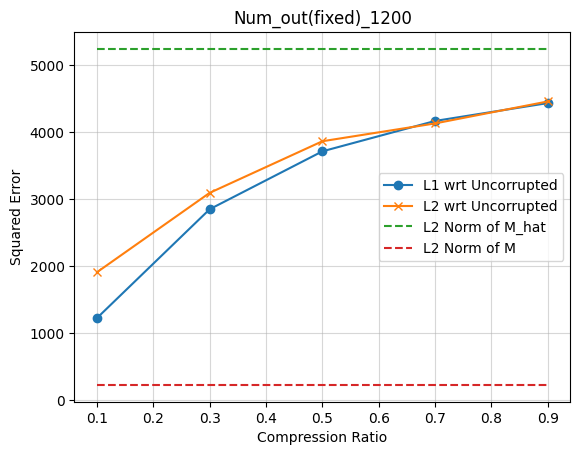

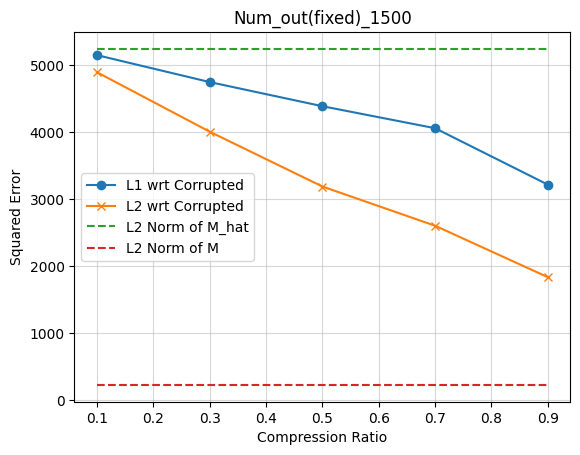

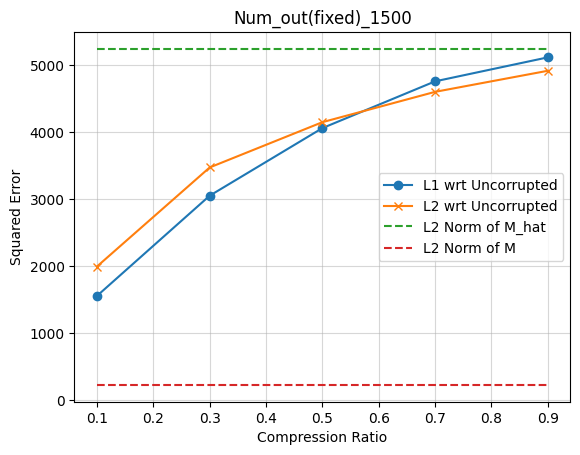

In [14]:
# np.random.seed(1)
# Size of matrix
size = (100, 30)
# Generate random matrix
M = np.random.randint(-20, 20, (100, 30))
# Compression Ratios
comp_rat = [0.1, 0.3, 0.5, 0.7, 0.9]

list_l1_err_w = []
list_l1_err_wo = []
list_l2_err_w = []
list_l2_err_wo = []

for r in comp_rat:
    # Compute rank for given compression ratio 
    rank = round((np.prod(M.shape)*r)/(M.shape[0] + M.shape[1]), 0).astype(int)
    assert rank >= 1, "Rank should be greater than or equal to 1"

    # Reduce rank of matrix
    A, S, B = np.linalg.svd(M, full_matrices = True)
    M = A[:, :rank] @ np.diag(S[:rank]) @ B[:rank, :]

    l1_err_w = []
    l1_err_wo = []
    l2_err_w = []
    l2_err_wo = []

    # Number of outliers
    num_out = [300, 600, 900, 1200, 1500]
    
    for num in num_out:
        print("Number of outliers: ", num)

        # M_hat = corrupted matrix with outliers (outliers are uniformly distributed)
        M_hat = deepcopy(M)
        f_indices = np.random.randint(0, np.prod(size), num)
        for i in f_indices:
            M_hat[np.unravel_index(i, size)] = np.random.randint(100, 200) * np.random.choice([-1, 1])
        

        # L1_Norm_TTD_AltConvPro
        U, V, losses = utils.AltConvPro_LP(M_hat, rank = rank, iterations = 30)
        X1 = U @ V.T
        l1_err_w.append(np.linalg.norm(M_hat - X1))
        l1_err_wo.append(np.linalg.norm(M - X1))

        # TTD
        X, Y, Z = np.linalg.svd(M_hat, full_matrices = False)
        X = X[:, :rank]
        Z = Z[:rank, :]
        X2 = X @ np.diag(Y[:rank]) @ Z
        l2_err_w.append(np.linalg.norm(M_hat - X2))
        l2_err_wo.append(np.linalg.norm(M - X2))

    # Plot reconstruction error vs number of outliers for fixed compression ratio and rank
    plt.figure()
    plt.title("Compression Ratio (fixed): " + str(r) + " Rank (fixed): " + str(rank))
    plt.xlabel("Number of Outliers")
    plt.ylabel("Squared Error")
    plt.plot(num_out, l1_err_w, label = "L1 wrt Corrupted", marker = 'o', linestyle = '-')
    plt.plot(num_out, l2_err_w, label = "L2 wrt Corrupted", marker = 'x', linestyle = '-')
    plt.plot(num_out, [np.linalg.norm(M_hat)]*len(num_out), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(num_out, [np.linalg.norm(M)]*len(num_out), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Comp_ratio(fixed)_" + str(r) + "rank(fixed)_" + str(rank) + "w.png")

    plt.figure()
    plt.title("Compression Ratio (fixed): " + str(r) + " Rank (fixed): " + str(rank))
    plt.xlabel("Number of Outliers")
    plt.ylabel("Squared Error")
    plt.plot(num_out, l1_err_wo, label = "L1 wrt Uncorrupted", marker = 'o', linestyle = '-')
    plt.plot(num_out, l2_err_wo, label = "L2 wrt Uncorrupted", marker = 'x', linestyle = '-')
    plt.plot(num_out, [np.linalg.norm(M_hat)]*len(num_out), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(num_out, [np.linalg.norm(M)]*len(num_out), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Comp_ratio(fixed)_" + str(r) + "rank(fixed)_" + str(rank) + "wo.png")

    list_l1_err_w.append(l1_err_w)
    list_l1_err_wo.append(l1_err_wo)
    list_l2_err_w.append(l2_err_w)
    list_l2_err_wo.append(l2_err_wo)

# Plot reconstruction error vs compression ratio for fixed number of outliers
for idx, num in enumerate(num_out):
    plt.figure()
    plt.title("Num_out(fixed)_" + str(num))
    plt.xlabel("Compression Ratio")
    plt.ylabel("Squared Error")
    plt.plot(comp_rat, [list_l1_err_w[j][idx] for j in range(len(list_l1_err_w))], label = "L1 wrt Corrupted", marker = 'o', linestyle = '-')
    plt.plot(comp_rat,  [list_l2_err_w[j][idx] for j in range(len(list_l2_err_w))], label = "L2 wrt Corrupted", marker = 'x', linestyle = '-')
    plt.plot(comp_rat, [np.linalg.norm(M_hat)]*len(comp_rat), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(comp_rat, [np.linalg.norm(M)]*len(comp_rat), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Num_out(fixed)_" + str(num) + "w.png")

    plt.figure()
    plt.title("Num_out(fixed)_" + str(num))
    plt.xlabel("Compression Ratio")
    plt.ylabel("Squared Error")
    plt.plot(comp_rat,  [list_l1_err_wo[j][idx] for j in range(len(list_l1_err_wo))], label = "L1 wrt Uncorrupted", marker = 'o', linestyle = '-')
    plt.plot(comp_rat,  [list_l2_err_wo[j][idx] for j in range(len(list_l2_err_wo))], label = "L2 wrt Uncorrupted", marker = 'x', linestyle = '-')
    plt.plot(comp_rat, [np.linalg.norm(M_hat)]*len(comp_rat), label = "L2 Norm of M_hat", linestyle = '--')
    plt.plot(comp_rat, [np.linalg.norm(M)]*len(comp_rat), label = "L2 Norm of M", linestyle = '--')
    plt.grid(alpha = 0.5)
    plt.legend()
    plt.show()
    # plt.savefig(".\\plots\\outlier_analysis\\Num_out(fixed)_" + str(num) + "wo.png")

## $\text{Experiment 3: Outlier and Compression Analysis - Tensor Case}$

In [33]:
# np.random.seed(0)
# Size of tensor
size = (10, 15, 10, 15)

# Generate random tensor
X = np.random.randn(*size) * 3
X_dash = X + np.random.randn(*size) * 1 # AWGN with sigma = 1

# Fraction of outliers as compared to total number of entries in the tensor
f_num_out = [0, 0.05, 0.1, 0.15, 0.2]
sigmas = [0, 4, 12, 20, 28]
num_out = [int(f * np.prod(size)) for f in f_num_out]

# TT-Ranks
# r = [1]
# for i in range(len(size)):
#     temp = utils.MATLAB_reshape(X_dash, (np.prod(size[:i+1]), -1))
#     r.append(np.linalg.matrix_rank(temp))
compression = True
r = [1, 6, 5, 6, 1]

# Reducing TT-Ranks (new_rank = comp_rat * TT_rank)
# Comment this block to use original TT-Ranks
# comp_rat = 0.3
# for i in range(1, len(r)-1):
#     r[i] = int(comp_rat * r[i])
# compression = True
assert all([r[i] >= 1 for i in range(1, len(r)-1)])

# Print General Information
print(f"\nTensor Size: {size}")
print(f"TT-Ranks: {r}")
print(F"Number of Entries in Original Tensor: {np.prod(size)}")
print(f"Total Number of Entries in TT-Cores after Compression: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}" if compression else f"Total Number of Entries in TT-Cores: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}")
print(f"Frobenius Norm of Original Tensor: {np.linalg.norm(X)}")

df1 = pd.DataFrame(columns = ["L1", "L2", "iter", "outliers", "sigma", 'nre_corr', 'nre_uncorr', 'max', 'min', 'close_to_zero', 'time'])
df2 = pd.DataFrame(columns = ["L1", "L2", "iter", "outliers", "sigma", 'nre_corr', 'nre_uncorr', 'max', 'min', 'close_to_zero', 'time'])

# Run for different number of outliers
iterations = 10
for _ in range(iterations):
    print(f"############## Iteration {_}")
    for iter, num in enumerate(num_out):
        for sigma in sigmas:
            # print(f"\n         Number of outliers (frac = {f_num_out[iter]}): {num}\n")

            # X_hat = corrupted tensor with outliers 
            X_hat = deepcopy(X_dash)

            # Add outliers uniformly at random
            if num != 0:
                f_indices = np.random.randint(0, np.prod(size), num)
                for i in f_indices:
                    X_hat[np.unravel_index(i, size)] +=  np.random.randn() * sigma

            print(f"Frobenius Norm of Corrupted Tensor: {np.linalg.norm(X_hat)}")
            # L1_Norm_TTD_AltConvPro
            print("\n############ L1_Norm_TTD_AltConvPro ############\n")
            G, losses, t = L1_Norm_TTD_AltConvPro.L1_TTD_AltConvPro(X_hat, ranks=r)
            # print(f"Normalized Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))/np.linalg.norm(X_hat)}")
            # print(f"Normalized Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))/np.linalg.norm(X)}")
            # print(f"Max, Min: ", max([np.max(g.ravel()) for g in G]), min([np.min(g.ravel()) for g in G]))
            # print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G])}")
            # print(f"Time: {t}s")
            data = {
                "L1": 1,
                "L2": 0,
                "iter": _,
                "outliers": num,
                "sigma": sigma,
                "nre_corr": np.linalg.norm(X_hat - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G)) / np.linalg.norm(X_hat),
                "nre_uncorr": np.linalg.norm(X - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G)) / np.linalg.norm(X),
                "max": max([np.max(g.ravel()) for g in G]),
                "min": min([np.min(g.ravel()) for g in G]),
                "close_to_zero": np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G]),
                "time": t
            }
            df1 = pd.concat([df1, pd.DataFrame([data])], ignore_index=True)
            display(df1.iloc[-1])

            # TTD
            print("\n############ L2_Norm_TTD_TTSVD ############\n")
            G_list, r1, t = TTD.TTD(X_hat, ranks=r)
            X_reconstructed = TTD.TTD_reconstruct(G_list)
            # print(f"Normalized Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - X_reconstructed)}")
            # print(f"Normalized Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - X_reconstructed)}")
            # print(f"Max, Min: ", max([np.max(g.ravel()) for g in G_list]), min([np.min(g.ravel()) for g in G_list]))
            # print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G_list])}")
            # print(f"Time: {t}s")
            data = {
                "L1": 0,
                "L2": 1,
                "iter": _,
                "outliers": num,
                "sigma": sigma,
                "nre_corr": np.linalg.norm(X_hat - X_reconstructed) / np.linalg.norm(X_hat),
                "nre_uncorr": np.linalg.norm(X - X_reconstructed) / np.linalg.norm(X),
                "max": max([np.max(g.ravel()) for g in G_list]),
                "min": min([np.min(g.ravel()) for g in G_list]),
                "close_to_zero": np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G_list]),
                "time": t
            }
            df2 = pd.concat([df2, pd.DataFrame([data])], ignore_index=True)
            display(df2.iloc[-1])


Tensor Size: (10, 15, 10, 15)
TT-Ranks: [1, 6, 5, 6, 1]
Number of Entries in Original Tensor: 22500
Total Number of Entries in TT-Cores after Compression: 900
Frobenius Norm of Original Tensor: 448.3729256279975
############## Iteration 0
Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:01, 12.05it/s]
C:\Users\Hrriday\AppData\Local\Temp\ipykernel_5356\2815140912.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df1, pd.DataFrame([data])], ignore_index=True)


L1                        1
L2                        0
iter                      0
outliers                  0
sigma                     0
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time              49.596331
Name: 0, dtype: object


############ L2_Norm_TTD_TTSVD ############



C:\Users\Hrriday\AppData\Local\Temp\ipykernel_5356\2815140912.py:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2 = pd.concat([df2, pd.DataFrame([data])], ignore_index=True)


L1                       0
L2                       1
iter                     0
outliers                 0
sigma                    0
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time              0.036541
Name: 0, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02, 10.95it/s]


L1                        1
L2                        0
iter                      0
outliers                  0
sigma                     4
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time              49.345274
Name: 1, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                    4
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time              0.029077
Name: 1, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02, 11.57it/s]


L1                        1
L2                        0
iter                      0
outliers                  0
sigma                    12
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time              48.865829
Name: 2, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                   12
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time              0.031919
Name: 2, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02, 11.73it/s]


L1                        1
L2                        0
iter                      0
outliers                  0
sigma                    20
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time               47.31249
Name: 3, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                   20
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time              0.036905
Name: 3, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:01, 12.04it/s]


L1                        1
L2                        0
iter                      0
outliers                  0
sigma                    28
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time               48.42601
Name: 4, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                   28
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time              0.022909
Name: 4, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02, 10.96it/s]


L1                        1
L2                        0
iter                      0
outliers               1125
sigma                     0
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time              48.096619
Name: 5, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                    0
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time                0.0258
Name: 5, dtype: object

Frobenius Norm of Corrupted Tensor: 490.1996738334987

############ L1_Norm_TTD_AltConvPro ############



 17%|█▋        | 5/30 [00:00<00:02, 11.40it/s]


L1                       1
L2                       0
iter                     0
outliers              1125
sigma                    4
nre_corr          1.010825
nre_uncorr        1.018393
max                8.40733
min             -14.997189
close_to_zero           80
time             55.295647
Name: 6, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                    4
nre_corr          0.968914
nre_uncorr         0.97552
max              34.271871
min             -23.550089
close_to_zero            1
time              0.023701
Name: 6, dtype: object

Frobenius Norm of Corrupted Tensor: 618.0617257667587

############ L1_Norm_TTD_AltConvPro ############



 57%|█████▋    | 17/30 [00:01<00:01, 12.27it/s]


L1                        1
L2                        0
iter                      0
outliers               1125
sigma                    12
nre_corr           0.993964
nre_uncorr         1.004526
max              203.591452
min               -7.240986
close_to_zero            46
time              61.039233
Name: 7, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                   12
nre_corr          0.964823
nre_uncorr        1.006548
max              40.467981
min              -56.94138
close_to_zero            1
time              0.025981
Name: 7, dtype: object

Frobenius Norm of Corrupted Tensor: 813.0626136724046

############ L1_Norm_TTD_AltConvPro ############



 37%|███▋      | 11/30 [00:00<00:01, 12.40it/s]


L1                        1
L2                        0
iter                      0
outliers               1125
sigma                    20
nre_corr           0.995952
nre_uncorr         1.010666
max              279.475403
min               -8.617937
close_to_zero            76
time              47.507862
Name: 8, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                   20
nre_corr          0.959317
nre_uncorr        1.072232
max              70.865067
min             -68.570438
close_to_zero            0
time              0.026915
Name: 8, dtype: object

Frobenius Norm of Corrupted Tensor: 1081.5483291239452

############ L1_Norm_TTD_AltConvPro ############



 23%|██▎       | 7/30 [00:00<00:02, 11.40it/s]


L1                       1
L2                       0
iter                     0
outliers              1125
sigma                   28
nre_corr          0.992655
nre_uncorr         1.05371
max              37.106883
min             -71.075718
close_to_zero           81
time             41.108393
Name: 9, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               1125
sigma                    28
nre_corr           0.950326
nre_uncorr         1.215885
max              106.892894
min             -131.835317
close_to_zero             1
time               0.023664
Name: 9, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02, 11.88it/s]


L1                        1
L2                        0
iter                      0
outliers               2250
sigma                     0
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time              48.717387
Name: 10, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              2250
sigma                    0
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time              0.022954
Name: 10, dtype: object

Frobenius Norm of Corrupted Tensor: 509.54999209317947

############ L1_Norm_TTD_AltConvPro ############



 30%|███       | 9/30 [00:00<00:01, 11.99it/s]


L1                        1
L2                        0
iter                      0
outliers               2250
sigma                     4
nre_corr           0.995203
nre_uncorr         1.005753
max              162.643344
min              -11.879456
close_to_zero            53
time              61.162737
Name: 11, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              2250
sigma                    4
nre_corr          0.970034
nre_uncorr         0.98085
max              22.620955
min             -31.917619
close_to_zero            0
time              0.026225
Name: 11, dtype: object

Frobenius Norm of Corrupted Tensor: 752.6123532297283

############ L1_Norm_TTD_AltConvPro ############



 50%|█████     | 15/30 [00:01<00:01, 11.74it/s]


L1                       1
L2                       0
iter                     0
outliers              2250
sigma                   12
nre_corr          0.995362
nre_uncorr        1.016541
max              56.130552
min             -11.700589
close_to_zero           55
time              57.38798
Name: 12, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              2250
sigma                   12
nre_corr          0.966291
nre_uncorr        1.041244
max              47.299869
min             -85.468358
close_to_zero            0
time              0.029916
Name: 12, dtype: object

Frobenius Norm of Corrupted Tensor: 1052.8128186954934

############ L1_Norm_TTD_AltConvPro ############



 57%|█████▋    | 17/30 [00:01<00:01, 11.97it/s]


L1                       1
L2                       0
iter                     0
outliers              2250
sigma                   20
nre_corr          0.994331
nre_uncorr        1.029248
max              96.923918
min             -14.807492
close_to_zero           55
time             58.447866
Name: 13, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               2250
sigma                    20
nre_corr           0.962996
nre_uncorr         1.140759
max               57.926659
min             -107.923634
close_to_zero             1
time               0.028663
Name: 13, dtype: object

Frobenius Norm of Corrupted Tensor: 1412.6920009641753

############ L1_Norm_TTD_AltConvPro ############



 17%|█▋        | 5/30 [00:00<00:02, 11.24it/s]


L1                        1
L2                        0
iter                      0
outliers               2250
sigma                    28
nre_corr           0.989415
nre_uncorr          1.07677
max              478.509749
min               -6.104396
close_to_zero            87
time              31.808258
Name: 14, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               2250
sigma                    28
nre_corr           0.962402
nre_uncorr         1.276647
max                 93.8941
min             -123.651536
close_to_zero             1
time               0.028081
Name: 14, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02, 11.75it/s]


L1                        1
L2                        0
iter                      0
outliers               3375
sigma                     0
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time              51.503691
Name: 15, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              3375
sigma                    0
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time              0.026855
Name: 15, dtype: object

Frobenius Norm of Corrupted Tensor: 527.5076840010406

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02,  8.02it/s]


L1                       1
L2                       0
iter                     0
outliers              3375
sigma                    4
nre_corr          1.008032
nre_uncorr        1.020132
max              13.055395
min               -7.16727
close_to_zero           80
time             68.460587
Name: 16, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              3375
sigma                    4
nre_corr          0.968381
nre_uncorr        0.980132
max              35.000188
min             -25.581727
close_to_zero            0
time               0.02416
Name: 16, dtype: object

Frobenius Norm of Corrupted Tensor: 843.0142062604272

############ L1_Norm_TTD_AltConvPro ############



 30%|███       | 9/30 [00:00<00:01, 12.01it/s]


L1                        1
L2                        0
iter                      0
outliers               3375
sigma                    12
nre_corr           0.991116
nre_uncorr         1.016573
max              275.802802
min               -7.023085
close_to_zero            52
time              54.100405
Name: 17, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              3375
sigma                   12
nre_corr          0.964459
nre_uncorr        1.062186
max              62.471415
min             -67.285802
close_to_zero            0
time              0.028714
Name: 17, dtype: object

Frobenius Norm of Corrupted Tensor: 1252.0104839615365

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:00<00:01, 12.35it/s]


L1                        1
L2                        0
iter                      0
outliers               3375
sigma                    20
nre_corr           0.991665
nre_uncorr         1.056696
max              115.102585
min              -15.723324
close_to_zero            54
time              37.426371
Name: 18, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              3375
sigma                   20
nre_corr          0.964868
nre_uncorr        1.193004
max              98.554708
min             -92.333314
close_to_zero            1
time              0.024886
Name: 18, dtype: object

Frobenius Norm of Corrupted Tensor: 1701.0003437118805

############ L1_Norm_TTD_AltConvPro ############



 23%|██▎       | 7/30 [00:00<00:02, 11.48it/s]


L1                       1
L2                       0
iter                     0
outliers              3375
sigma                   28
nre_corr          0.995002
nre_uncorr        1.059817
max               40.23181
min             -63.110633
close_to_zero           70
time             41.651311
Name: 19, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               3375
sigma                    28
nre_corr           0.964825
nre_uncorr         1.380177
max              142.036244
min             -164.043267
close_to_zero             0
time               0.026139
Name: 19, dtype: object

Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:02, 11.90it/s]


L1                        1
L2                        0
iter                      0
outliers               4500
sigma                     0
nre_corr           0.996864
nre_uncorr         1.001011
max              151.005596
min               -7.924292
close_to_zero            81
time              48.461167
Name: 20, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              4500
sigma                    0
nre_corr          0.968929
nre_uncorr        0.972271
max              21.959325
min             -43.631139
close_to_zero            0
time               0.02573
Name: 20, dtype: object

Frobenius Norm of Corrupted Tensor: 542.6792410222951

############ L1_Norm_TTD_AltConvPro ############



 40%|████      | 12/30 [00:00<00:01, 12.96it/s]


L1                        1
L2                        0
iter                      0
outliers               4500
sigma                     4
nre_corr           0.994388
nre_uncorr          1.00943
max              176.159345
min              -10.743157
close_to_zero            57
time              61.438217
Name: 21, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              4500
sigma                    4
nre_corr          0.969825
nre_uncorr        0.986302
max              45.897345
min             -30.468362
close_to_zero            0
time              0.025558
Name: 21, dtype: object

Frobenius Norm of Corrupted Tensor: 941.5443419765124

############ L1_Norm_TTD_AltConvPro ############



 50%|█████     | 15/30 [00:01<00:01, 13.05it/s]


L1                        1
L2                        0
iter                      0
outliers               4500
sigma                    12
nre_corr            0.98955
nre_uncorr          1.02469
max              308.680305
min               -6.904533
close_to_zero            64
time              37.982758
Name: 22, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              4500
sigma                   12
nre_corr          0.965742
nre_uncorr        1.090163
max              45.972285
min             -95.326228
close_to_zero            0
time              0.017303
Name: 22, dtype: object

Frobenius Norm of Corrupted Tensor: 1418.9351906294112

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:00<00:01, 12.07it/s]


L1                        1
L2                        0
iter                      0
outliers               4500
sigma                    20
nre_corr           0.992823
nre_uncorr         1.047379
max              454.573861
min               -8.737369
close_to_zero            80
time              33.794308
Name: 23, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               4500
sigma                    20
nre_corr             0.9635
nre_uncorr         1.266279
max               86.124726
min             -102.257871
close_to_zero             1
time               0.024637
Name: 23, dtype: object

Frobenius Norm of Corrupted Tensor: 1977.1055642078086

############ L1_Norm_TTD_AltConvPro ############



 43%|████▎     | 13/30 [00:01<00:01, 12.97it/s]


L1                        1
L2                        0
iter                      0
outliers               4500
sigma                    28
nre_corr           0.991002
nre_uncorr         1.117495
max              647.499467
min               -8.362209
close_to_zero            57
time              28.668238
Name: 24, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               4500
sigma                    28
nre_corr           0.964582
nre_uncorr         1.496944
max               133.80888
min             -138.672532
close_to_zero             1
time               0.021024
Name: 24, dtype: object

############## Iteration 1
Frobenius Norm of Corrupted Tensor: 471.971961554407

############ L1_Norm_TTD_AltConvPro ############



 10%|█         | 3/30 [00:18<02:47,  6.22s/it]


KeyboardInterrupt: 

In [65]:
df1.to_csv("L1_analysis_1.csv") # Fixed ranks r = [1, 6, 5, 6, 1]
df2.to_csv("L2_analysis_1.csv") # Fixed ranks r = [1, 6, 5, 6, 1]

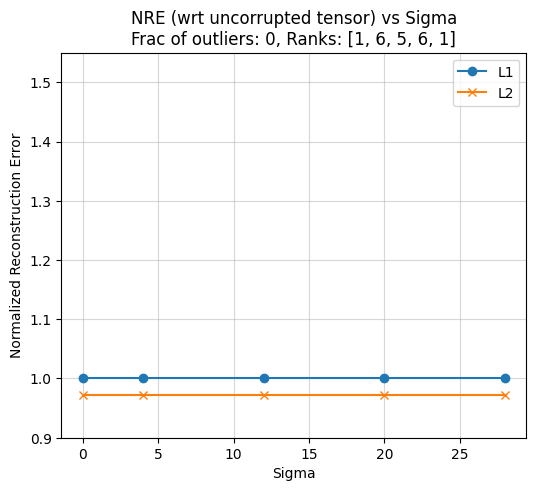

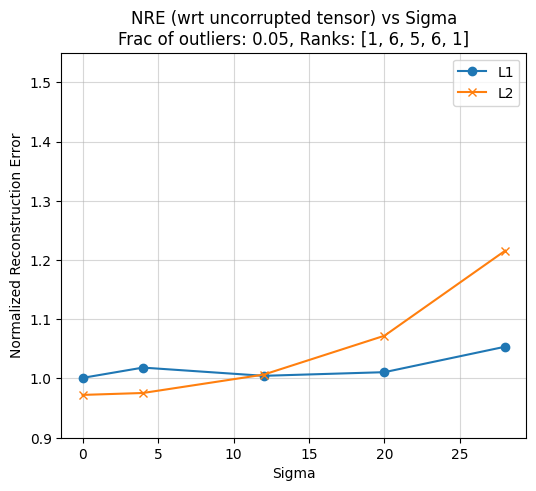

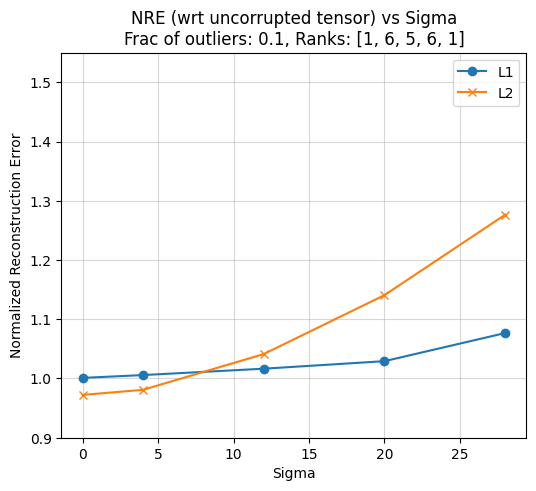

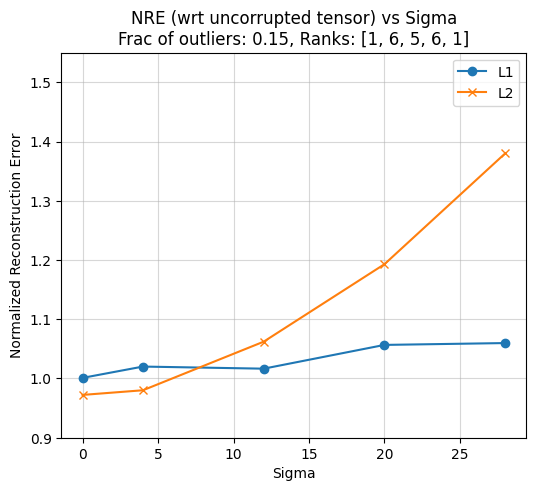

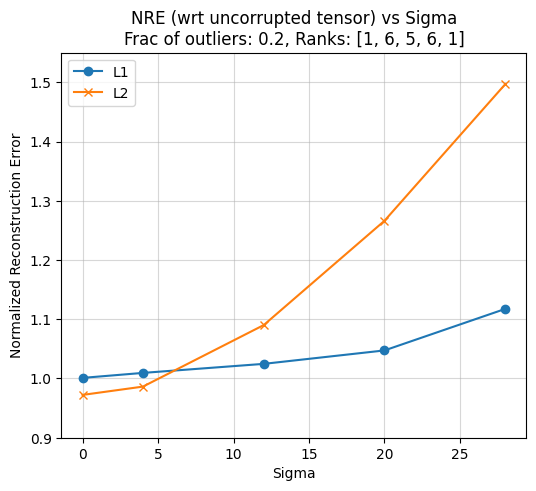

In [60]:
# NRE vs Sigma for different number of outliers
for i in range(len(num_out)):
    plt.figure(figsize=(6, 5))
    plt.plot(df1[df1["outliers"]==num_out[i]]["sigma"], df1[df1["outliers"]==num_out[i]]["nre_uncorr"], label = "L1", marker = 'o', linestyle = '-')
    plt.plot(df2[df2["outliers"]==num_out[i]]["sigma"], df2[df2["outliers"]==num_out[i]]["nre_uncorr"], label = "L2", marker = 'x', linestyle = '-')
    plt.xlabel("Sigma")
    plt.ylabel("Normalized Reconstruction Error")
    plt.title("NRE (wrt uncorrupted tensor) vs Sigma\nFrac of outliers: " + str(f_num_out[i]) + ", Ranks: " + str(r))
    plt.ylim(0.9, 1.55)
    plt.grid(alpha = 0.5)
    plt.legend()

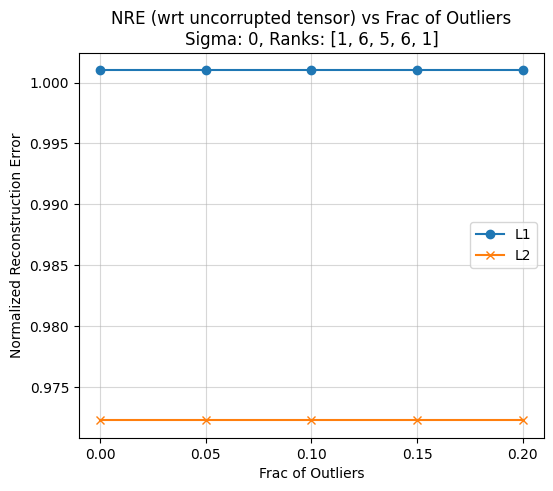

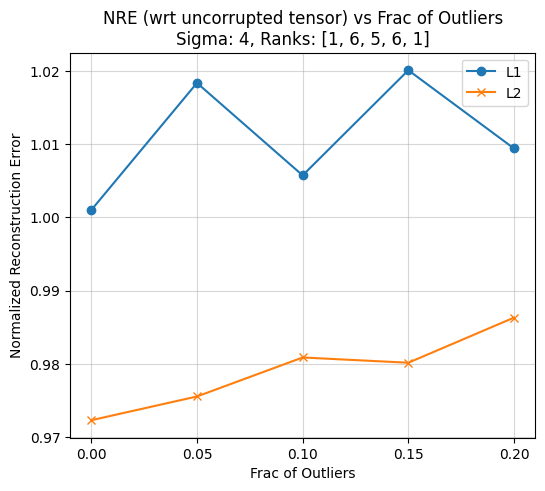

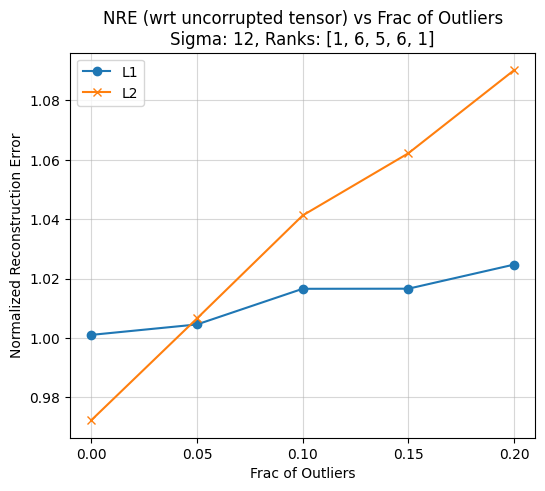

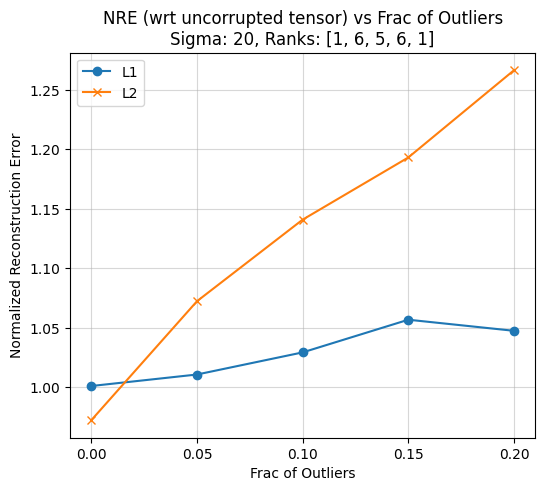

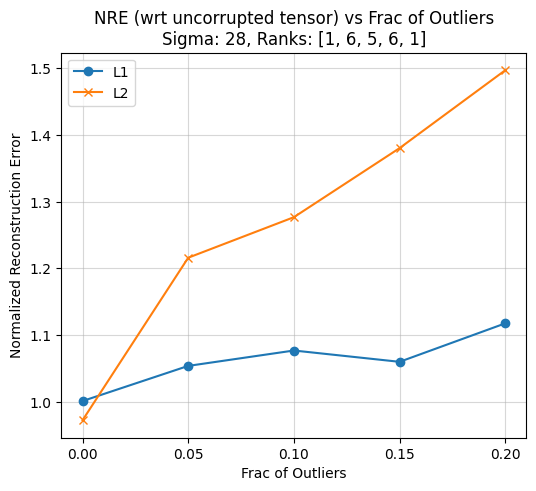

In [61]:
# NRE vs Number of Outliers for different sigmas
for i in range(len(sigmas)):
    plt.figure(figsize=(6, 5))
    plt.plot(df1[df1["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df1[df1["sigma"]==sigmas[i]]["nre_uncorr"], label = "L1", marker = 'o', linestyle = '-')
    plt.plot(df2[df2["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df2[df2["sigma"]==sigmas[i]]["nre_uncorr"], label = "L2", marker = 'x', linestyle = '-')
    plt.xlabel("Frac of Outliers")
    plt.ylabel("Normalized Reconstruction Error")
    plt.title("NRE (wrt uncorrupted tensor) vs Frac of Outliers\nSigma: " + str(sigmas[i]) + ", Ranks: " + str(r))
    plt.grid(alpha = 0.5)
    plt.xticks(f_num_out)
    plt.legend()

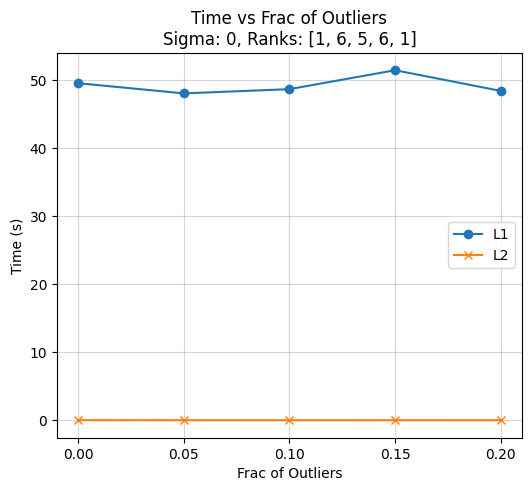

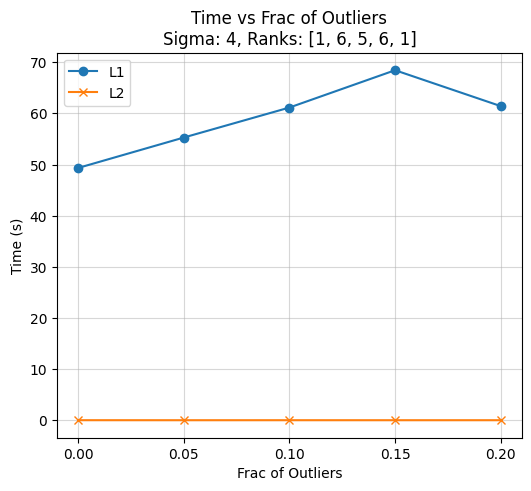

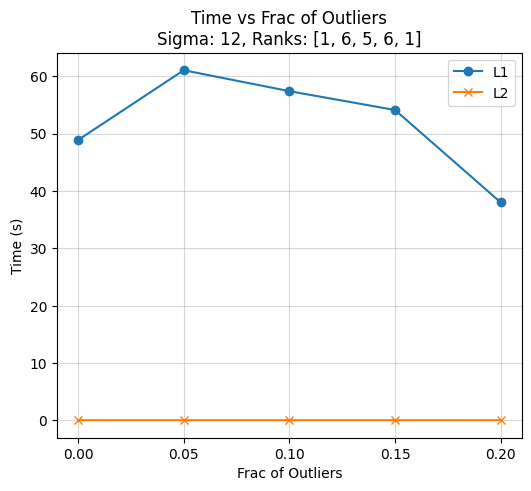

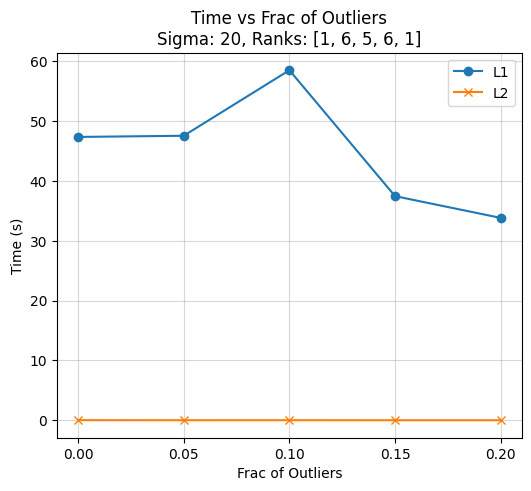

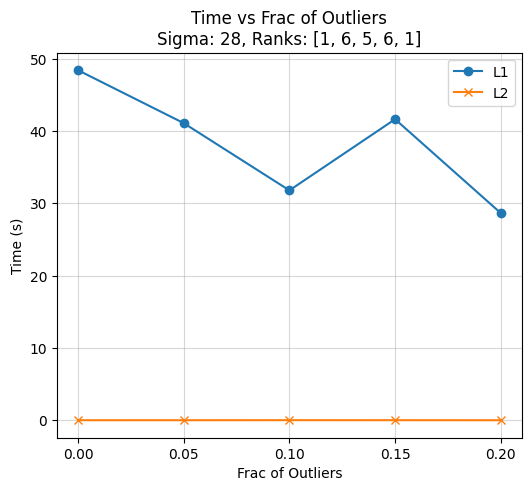

In [63]:
# time vs Number of Outliers for different sigmas
for i in range(len(sigmas)):
    plt.figure(figsize=(6, 5))
    plt.plot(df1[df1["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df1[df1["sigma"]==sigmas[i]]["time"], label = "L1", marker = 'o', linestyle = '-')
    plt.plot(df2[df2["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df2[df2["sigma"]==sigmas[i]]["time"], label = "L2", marker = 'x', linestyle = '-')
    plt.xlabel("Frac of Outliers")
    plt.ylabel("Time (s)")
    plt.title("Time vs Frac of Outliers\nSigma: " + str(sigmas[i]) + ", Ranks: " + str(r))
    plt.grid(alpha = 0.5)
    plt.xticks(f_num_out)
    plt.legend()

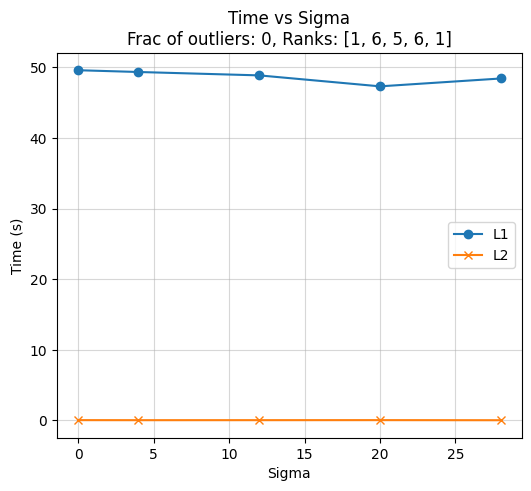

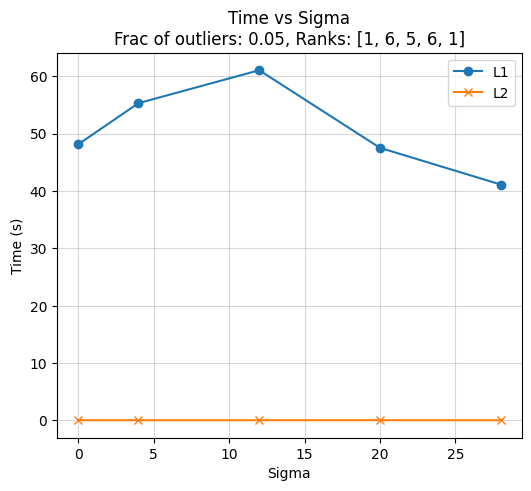

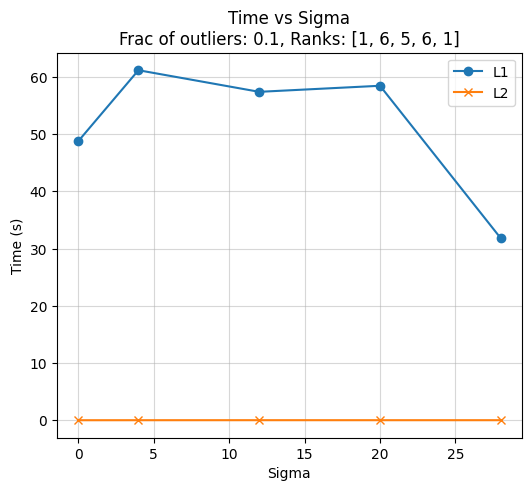

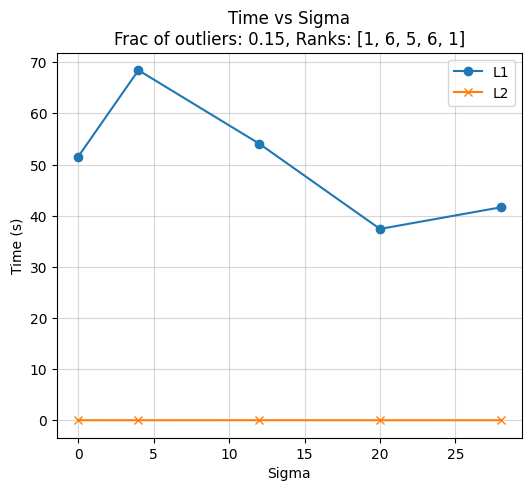

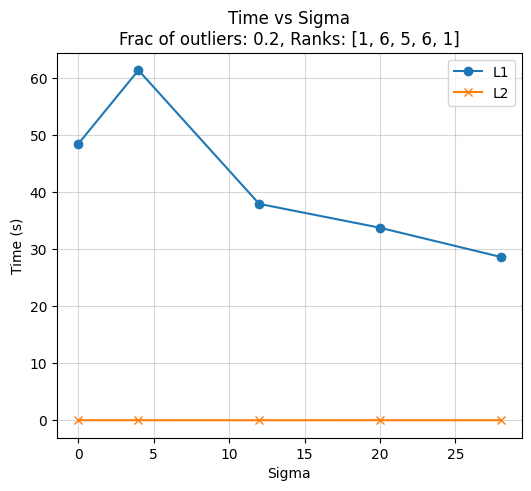

In [64]:
# time vs sigma for different number of outlier
for i in range(len(num_out)):
    plt.figure(figsize=(6, 5))
    plt.plot(df1[df1["outliers"]==num_out[i]]["sigma"], df1[df1["outliers"]==num_out[i]]["time"], label = "L1", marker = 'o', linestyle = '-')
    plt.plot(df2[df2["outliers"]==num_out[i]]["sigma"], df2[df2["outliers"]==num_out[i]]["time"], label = "L2", marker = 'x', linestyle = '-')
    plt.xlabel("Sigma")
    plt.ylabel("Time (s)")
    plt.title("Time vs Sigma\nFrac of outliers: " + str(f_num_out[i]) + ", Ranks: " + str(r))
    plt.grid(alpha = 0.5)
    plt.legend()

In [66]:
# np.random.seed(0)
# Size of tensor
size = (10, 15, 10, 15)

# Generate random tensor
X = np.random.randn(*size) * 3
X_dash = X + np.random.randn(*size) * 1 # AWGN with sigma = 1

# Fraction of outliers as compared to total number of entries in the tensor
f_num_out = [0, 0.05, 0.1, 0.15, 0.2]
sigmas = [0, 4, 12, 20, 28]
num_out = [int(f * np.prod(size)) for f in f_num_out]

# TT-Ranks
# r = [1]
# for i in range(len(size)):
#     temp = utils.MATLAB_reshape(X_dash, (np.prod(size[:i+1]), -1))
#     r.append(np.linalg.matrix_rank(temp))
compression = True
r = [1, 8, 9, 8, 1]

# Reducing TT-Ranks (new_rank = comp_rat * TT_rank)
# Comment this block to use original TT-Ranks
# comp_rat = 0.3
# for i in range(1, len(r)-1):
#     r[i] = int(comp_rat * r[i])
# compression = True
assert all([r[i] >= 1 for i in range(1, len(r)-1)])

# Print General Information
print(f"\nTensor Size: {size}")
print(f"TT-Ranks: {r}")
print(F"Number of Entries in Original Tensor: {np.prod(size)}")
print(f"Total Number of Entries in TT-Cores after Compression: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}" if compression else f"Total Number of Entries in TT-Cores: {np.sum([r[i] * r[i+1] * size[i] for i in range(len(size))])}")
print(f"Frobenius Norm of Original Tensor: {np.linalg.norm(X)}")

df3 = pd.DataFrame(columns = ["L1", "L2", "iter", "outliers", "sigma", 'nre_corr', 'nre_uncorr', 'max', 'min', 'close_to_zero', 'time'])
df4 = pd.DataFrame(columns = ["L1", "L2", "iter", "outliers", "sigma", 'nre_corr', 'nre_uncorr', 'max', 'min', 'close_to_zero', 'time'])

# Run for different number of outliers
iterations = 10
for _ in range(iterations):
    print(f"############## Iteration {_}")
    for iter, num in enumerate(num_out):
        for sigma in sigmas:
            # print(f"\n         Number of outliers (frac = {f_num_out[iter]}): {num}\n")

            # X_hat = corrupted tensor with outliers 
            X_hat = deepcopy(X_dash)

            # Add outliers uniformly at random
            if num != 0:
                f_indices = np.random.randint(0, np.prod(size), num)
                for i in f_indices:
                    X_hat[np.unravel_index(i, size)] +=  np.random.randn() * sigma

            print(f"Frobenius Norm of Corrupted Tensor: {np.linalg.norm(X_hat)}")
            # L1_Norm_TTD_AltConvPro
            print("\n############ L1_Norm_TTD_AltConvPro ############\n")
            G, losses, t = L1_Norm_TTD_AltConvPro.L1_TTD_AltConvPro(X_hat, ranks=r)
            # print(f"Normalized Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))/np.linalg.norm(X_hat)}")
            # print(f"Normalized Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G))/np.linalg.norm(X)}")
            # print(f"Max, Min: ", max([np.max(g.ravel()) for g in G]), min([np.min(g.ravel()) for g in G]))
            # print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G])}")
            # print(f"Time: {t}s")
            data = {
                "L1": 1,
                "L2": 0,
                "iter": _,
                "outliers": num,
                "sigma": sigma,
                "nre_corr": np.linalg.norm(X_hat - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G)) / np.linalg.norm(X_hat),
                "nre_uncorr": np.linalg.norm(X - L1_Norm_TTD_AltConvPro.TTD_reconstruct(G)) / np.linalg.norm(X),
                "max": max([np.max(g.ravel()) for g in G]),
                "min": min([np.min(g.ravel()) for g in G]),
                "close_to_zero": np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G]),
                "time": t
            }
            df3 = pd.concat([df3, pd.DataFrame([data])], ignore_index=True)
            display(df3.iloc[-1])

            # TTD
            print("\n############ L2_Norm_TTD_TTSVD ############\n")
            G_list, r1, t = TTD.TTD(X_hat, ranks=r)
            X_reconstructed = TTD.TTD_reconstruct(G_list)
            # print(f"Normalized Reconstruction Error (corrupted tensor):    {np.linalg.norm(X_hat - X_reconstructed)}")
            # print(f"Normalized Reconstruction Error (uncorrupted tensor):  {np.linalg.norm(X - X_reconstructed)}")
            # print(f"Max, Min: ", max([np.max(g.ravel()) for g in G_list]), min([np.min(g.ravel()) for g in G_list]))
            # print(f"Number of close-to-zero values (tol = 1e-4):    {np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G_list])}")
            # print(f"Time: {t}s")
            data = {
                "L1": 0,
                "L2": 1,
                "iter": _,
                "outliers": num,
                "sigma": sigma,
                "nre_corr": np.linalg.norm(X_hat - X_reconstructed) / np.linalg.norm(X_hat),
                "nre_uncorr": np.linalg.norm(X - X_reconstructed) / np.linalg.norm(X),
                "max": max([np.max(g.ravel()) for g in G_list]),
                "min": min([np.min(g.ravel()) for g in G_list]),
                "close_to_zero": np.sum([np.sum(np.abs(g.ravel()) < 1e-4) for g in G_list]),
                "time": t
            }
            df4 = pd.concat([df4, pd.DataFrame([data])], ignore_index=True)
            display(df4.iloc[-1])


Tensor Size: (10, 15, 10, 15)
TT-Ranks: [1, 8, 9, 8, 1]
Number of Entries in Original Tensor: 22500
Total Number of Entries in TT-Cores after Compression: 2000
Frobenius Norm of Original Tensor: 445.6543287842675
############## Iteration 0
Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.74it/s]
C:\Users\Hrriday\AppData\Local\Temp\ipykernel_5356\2331448769.py:79: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df3 = pd.concat([df3, pd.DataFrame([data])], ignore_index=True)


L1                       1
L2                       0
iter                     0
outliers                 0
sigma                    0
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             64.969441
Name: 0, dtype: object


############ L2_Norm_TTD_TTSVD ############



C:\Users\Hrriday\AppData\Local\Temp\ipykernel_5356\2331448769.py:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df4 = pd.concat([df4, pd.DataFrame([data])], ignore_index=True)


L1                       0
L2                       1
iter                     0
outliers                 0
sigma                    0
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.050749
Name: 0, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:04,  5.16it/s]


L1                       1
L2                       0
iter                     0
outliers                 0
sigma                    4
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             66.648864
Name: 1, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                    4
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.038785
Name: 1, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  5.89it/s]


L1                       1
L2                       0
iter                     0
outliers                 0
sigma                   12
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             68.843863
Name: 2, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                   12
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.044904
Name: 2, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.65it/s]


L1                       1
L2                       0
iter                     0
outliers                 0
sigma                   20
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             69.807747
Name: 3, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                   20
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.038533
Name: 3, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.66it/s]


L1                       1
L2                       0
iter                     0
outliers                 0
sigma                   28
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             67.187819
Name: 4, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers                 0
sigma                   28
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.040529
Name: 4, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.22it/s]


L1                       1
L2                       0
iter                     0
outliers              1125
sigma                    0
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             72.486578
Name: 5, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                    0
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.041694
Name: 5, dtype: object

Frobenius Norm of Corrupted Tensor: 491.0124993314556

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:00<00:03,  6.05it/s]


L1                       1
L2                       0
iter                     0
outliers              1125
sigma                    4
nre_corr          1.008527
nre_uncorr        1.024447
max               5.612353
min              -4.577189
close_to_zero          180
time             81.230965
Name: 6, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                    4
nre_corr          0.933843
nre_uncorr        0.948883
max              36.128693
min             -39.446879
close_to_zero            1
time              0.044538
Name: 6, dtype: object

Frobenius Norm of Corrupted Tensor: 623.350565307775

############ L1_Norm_TTD_AltConvPro ############



 33%|███▎      | 10/30 [00:01<00:02,  6.69it/s]


L1                       1
L2                       0
iter                     0
outliers              1125
sigma                   12
nre_corr          1.015202
nre_uncorr        1.046307
max              16.744555
min              -8.249542
close_to_zero          186
time             74.502917
Name: 7, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                   12
nre_corr          0.931101
nre_uncorr        1.003691
max              57.206562
min             -50.921042
close_to_zero            3
time              0.044147
Name: 7, dtype: object

Frobenius Norm of Corrupted Tensor: 812.0608121728401

############ L1_Norm_TTD_AltConvPro ############



 30%|███       | 9/30 [00:01<00:03,  6.60it/s]


L1                        1
L2                        0
iter                      0
outliers               1125
sigma                    20
nre_corr           0.984242
nre_uncorr         1.010648
max              279.531221
min               -8.791611
close_to_zero           149
time              76.233841
Name: 8, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              1125
sigma                   20
nre_corr          0.920213
nre_uncorr         1.14362
max              89.572146
min              -77.49221
close_to_zero            2
time              0.043952
Name: 8, dtype: object

Frobenius Norm of Corrupted Tensor: 1055.5220065890342

############ L1_Norm_TTD_AltConvPro ############



 30%|███       | 9/30 [00:01<00:03,  6.23it/s]


L1                        1
L2                        0
iter                      0
outliers               1125
sigma                    28
nre_corr           0.982179
nre_uncorr         1.028792
max              354.365546
min               -6.370135
close_to_zero           131
time               63.92027
Name: 9, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               1125
sigma                    28
nre_corr           0.915592
nre_uncorr         1.292693
max              157.122746
min             -210.896733
close_to_zero             2
time               0.042696
Name: 9, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.85it/s]


L1                       1
L2                       0
iter                     0
outliers              2250
sigma                    0
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             67.422349
Name: 10, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              2250
sigma                    0
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.043674
Name: 10, dtype: object

Frobenius Norm of Corrupted Tensor: 509.3179858505803

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:01<00:04,  5.72it/s]


L1                       1
L2                       0
iter                     0
outliers              2250
sigma                    4
nre_corr          1.026222
nre_uncorr        1.050322
max               4.842402
min              -6.064849
close_to_zero          176
time             71.928859
Name: 11, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              2250
sigma                    4
nre_corr          0.932349
nre_uncorr        0.953248
max              49.815779
min             -40.045929
close_to_zero            1
time              0.047012
Name: 11, dtype: object

Frobenius Norm of Corrupted Tensor: 724.5709012935972

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.02it/s]


L1                       1
L2                       0
iter                     0
outliers              2250
sigma                   12
nre_corr          1.002788
nre_uncorr        1.063262
max              17.622743
min             -12.769717
close_to_zero          171
time             71.785423
Name: 12, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              2250
sigma                   12
nre_corr          0.924538
nre_uncorr         1.08016
max              44.059888
min             -88.265986
close_to_zero            2
time              0.049439
Name: 12, dtype: object

Frobenius Norm of Corrupted Tensor: 1056.0753060599636

############ L1_Norm_TTD_AltConvPro ############



 20%|██        | 6/30 [00:01<00:04,  5.81it/s]


L1                       1
L2                       0
iter                     0
outliers              2250
sigma                   20
nre_corr          0.992721
nre_uncorr        1.084843
max              45.979835
min             -21.833299
close_to_zero          178
time              84.78388
Name: 13, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              2250
sigma                   20
nre_corr          0.924168
nre_uncorr        1.251009
max              95.850191
min             -80.411564
close_to_zero            1
time               0.04327
Name: 13, dtype: object

Frobenius Norm of Corrupted Tensor: 1388.9035637559844

############ L1_Norm_TTD_AltConvPro ############



 47%|████▋     | 14/30 [00:02<00:02,  6.50it/s]


L1                       1
L2                       0
iter                     0
outliers              2250
sigma                   28
nre_corr          0.991216
nre_uncorr        1.102409
max              24.597424
min             -11.476172
close_to_zero          163
time             63.926842
Name: 14, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               2250
sigma                    28
nre_corr           0.917923
nre_uncorr         1.525001
max              191.478794
min             -153.867182
close_to_zero             1
time               0.046771
Name: 14, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.05it/s]


L1                       1
L2                       0
iter                     0
outliers              3375
sigma                    0
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             73.738601
Name: 15, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              3375
sigma                    0
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.046936
Name: 15, dtype: object

Frobenius Norm of Corrupted Tensor: 525.1965756453363

############ L1_Norm_TTD_AltConvPro ############



 10%|█         | 3/30 [00:00<00:06,  4.41it/s]


L1                       1
L2                       0
iter                     0
outliers              3375
sigma                    4
nre_corr          1.014626
nre_uncorr        1.044089
max               12.55395
min             -13.716683
close_to_zero          184
time             68.936629
Name: 16, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              3375
sigma                    4
nre_corr          0.930606
nre_uncorr        0.957497
max              40.116479
min             -45.947915
close_to_zero            0
time              0.046529
Name: 16, dtype: object

Frobenius Norm of Corrupted Tensor: 843.7502865614514

############ L1_Norm_TTD_AltConvPro ############



 30%|███       | 9/30 [00:01<00:04,  5.05it/s]


L1                        1
L2                        0
iter                      0
outliers               3375
sigma                    12
nre_corr           0.981101
nre_uncorr         1.053606
max              277.449574
min                -9.99532
close_to_zero           143
time             120.842543
Name: 17, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              3375
sigma                   12
nre_corr          0.931214
nre_uncorr        1.120928
max              79.441349
min             -75.266879
close_to_zero            2
time              0.045624
Name: 17, dtype: object

Frobenius Norm of Corrupted Tensor: 1266.5615960780613

############ L1_Norm_TTD_AltConvPro ############



 23%|██▎       | 7/30 [00:01<00:03,  5.81it/s]


L1                        1
L2                        0
iter                      0
outliers               3375
sigma                    20
nre_corr           0.977798
nre_uncorr         1.119339
max              429.061151
min               -6.692817
close_to_zero           135
time              53.577258
Name: 18, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               3375
sigma                    20
nre_corr            0.92569
nre_uncorr          1.38627
max              102.203584
min             -189.750112
close_to_zero             3
time               0.037273
Name: 18, dtype: object

Frobenius Norm of Corrupted Tensor: 1685.957128414576

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.44it/s]


L1                       1
L2                       0
iter                     0
outliers              3375
sigma                   28
nre_corr          0.981399
nre_uncorr         1.21872
max              27.165835
min             -24.346215
close_to_zero          172
time             59.181724
Name: 19, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               3375
sigma                    28
nre_corr           0.925506
nre_uncorr         1.672495
max              215.590531
min             -247.680896
close_to_zero             2
time                0.03785
Name: 19, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.45it/s]


L1                       1
L2                       0
iter                     0
outliers              4500
sigma                    0
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             74.838601
Name: 20, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              4500
sigma                    0
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.044461
Name: 20, dtype: object

Frobenius Norm of Corrupted Tensor: 536.7901783864903

############ L1_Norm_TTD_AltConvPro ############



 17%|█▋        | 5/30 [00:00<00:03,  6.38it/s]


L1                       1
L2                       0
iter                     0
outliers              4500
sigma                    4
nre_corr          1.020389
nre_uncorr        1.057876
max              18.307071
min             -12.618276
close_to_zero          186
time             71.521075
Name: 21, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              4500
sigma                    4
nre_corr          0.932817
nre_uncorr        0.966457
max               53.88971
min             -37.314012
close_to_zero            4
time              0.047276
Name: 21, dtype: object

Frobenius Norm of Corrupted Tensor: 929.33705693971

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.02it/s]


L1                       1
L2                       0
iter                     0
outliers              4500
sigma                   12
nre_corr          0.998315
nre_uncorr        1.099177
max               22.04402
min             -12.678159
close_to_zero          185
time             93.715597
Name: 22, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     0
outliers              4500
sigma                   12
nre_corr          0.928046
nre_uncorr        1.165909
max              84.112834
min             -83.944899
close_to_zero            1
time              0.050113
Name: 22, dtype: object

Frobenius Norm of Corrupted Tensor: 1425.7461268651343

############ L1_Norm_TTD_AltConvPro ############



 43%|████▎     | 13/30 [00:01<00:02,  6.85it/s]


L1                       1
L2                       0
iter                     0
outliers              4500
sigma                   20
nre_corr          0.988522
nre_uncorr        1.132884
max              54.769069
min             -42.494919
close_to_zero          177
time             70.988658
Name: 23, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               4500
sigma                    20
nre_corr           0.926766
nre_uncorr          1.48896
max              114.491877
min             -164.733752
close_to_zero             3
time               0.039623
Name: 23, dtype: object

Frobenius Norm of Corrupted Tensor: 1912.1452850496817

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.36it/s]


L1                        1
L2                        0
iter                      0
outliers               4500
sigma                    28
nre_corr           0.984368
nre_uncorr         1.211065
max              636.401497
min              -16.829129
close_to_zero           185
time              54.684983
Name: 24, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                        0
L2                        1
iter                      0
outliers               4500
sigma                    28
nre_corr           0.925331
nre_uncorr         1.842196
max              147.532522
min             -221.991206
close_to_zero             1
time               0.041171
Name: 24, dtype: object

############## Iteration 1
Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.89it/s]


L1                       1
L2                       0
iter                     1
outliers                 0
sigma                    0
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             68.972848
Name: 25, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     1
outliers                 0
sigma                    0
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.043213
Name: 25, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 27%|██▋       | 8/30 [00:01<00:03,  6.71it/s]


L1                       1
L2                       0
iter                     1
outliers                 0
sigma                    4
nre_corr           1.02137
nre_uncorr        1.033067
max               5.374851
min              -5.912631
close_to_zero          189
time             66.864893
Name: 26, dtype: object


############ L2_Norm_TTD_TTSVD ############



L1                       0
L2                       1
iter                     1
outliers                 0
sigma                    4
nre_corr           0.93276
nre_uncorr         0.94035
max              46.782643
min             -43.860846
close_to_zero            1
time              0.040897
Name: 26, dtype: object

Frobenius Norm of Corrupted Tensor: 470.7434606079475

############ L1_Norm_TTD_AltConvPro ############



 10%|█         | 3/30 [00:20<03:05,  6.89s/it]


KeyboardInterrupt: 

In [67]:
df3 = df3.iloc[:25, :]
df4 = df4.iloc[:25, :]
df3.to_csv("L1_analysis_3.csv") # Fixed ranks r = [1, 8, 9, 8, 1]
df4.to_csv("L2_analysis_3.csv") # Fixed ranks r = [1, 8, 9, 8, 1]

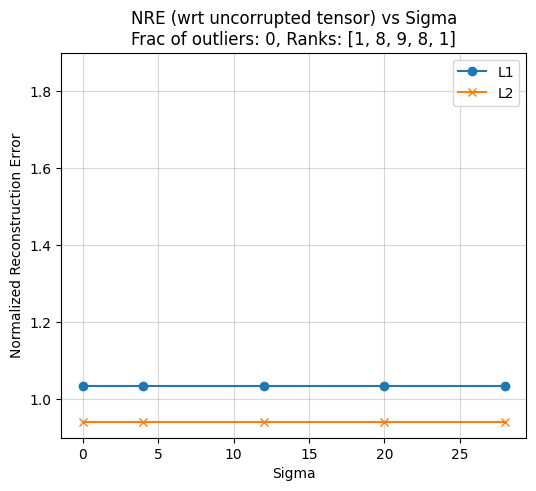

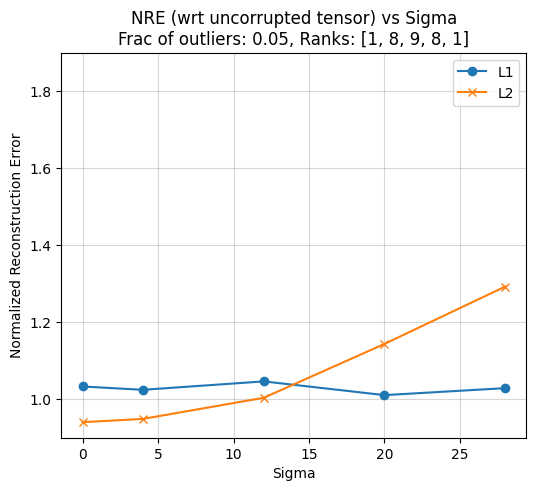

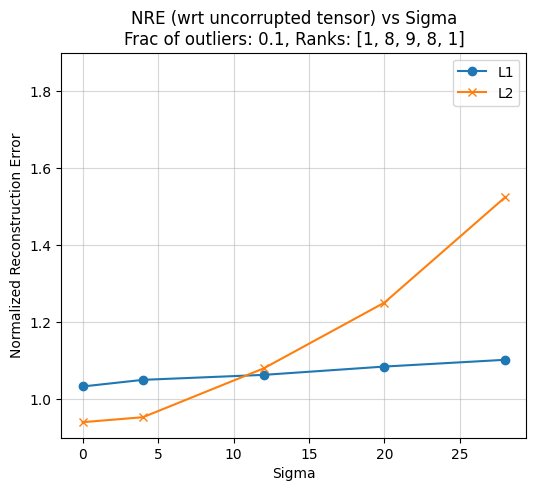

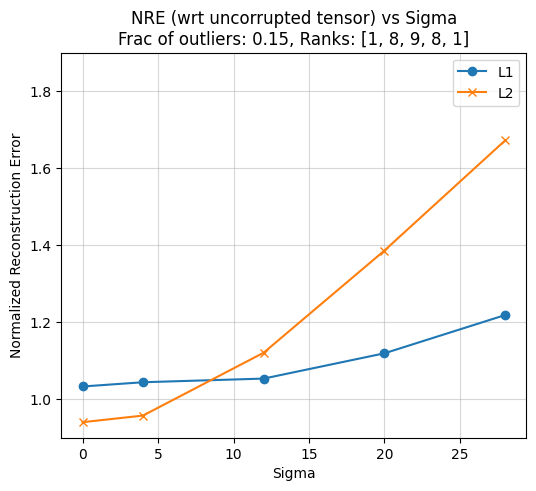

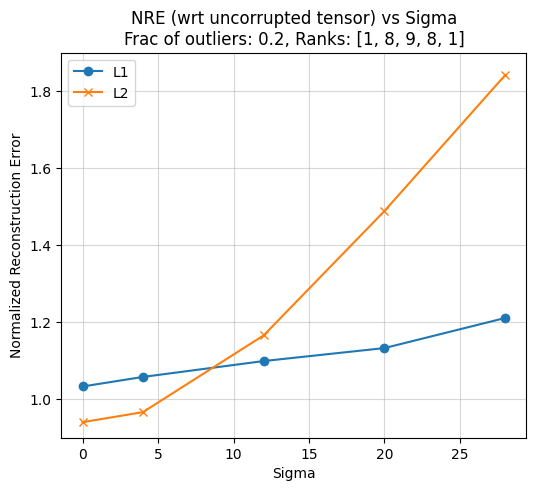

In [70]:
# NRE vs Sigma for different number of outliers
for i in range(len(num_out)):
    plt.figure(figsize=(6, 5))
    plt.plot(df3[df3["outliers"]==num_out[i]]["sigma"], df3[df3["outliers"]==num_out[i]]["nre_uncorr"], label = "L1", marker = 'o', linestyle = '-')
    plt.plot(df4[df4["outliers"]==num_out[i]]["sigma"], df4[df4["outliers"]==num_out[i]]["nre_uncorr"], label = "L2", marker = 'x', linestyle = '-')
    plt.xlabel("Sigma")
    plt.ylabel("Normalized Reconstruction Error")
    plt.title("NRE (wrt uncorrupted tensor) vs Sigma\nFrac of outliers: " + str(f_num_out[i]) + ", Ranks: " + str(r))
    plt.ylim(0.9, 1.9)
    plt.grid(alpha = 0.5)
    plt.legend()

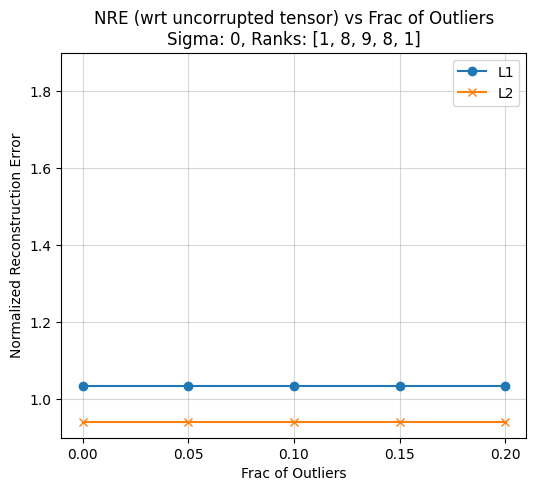

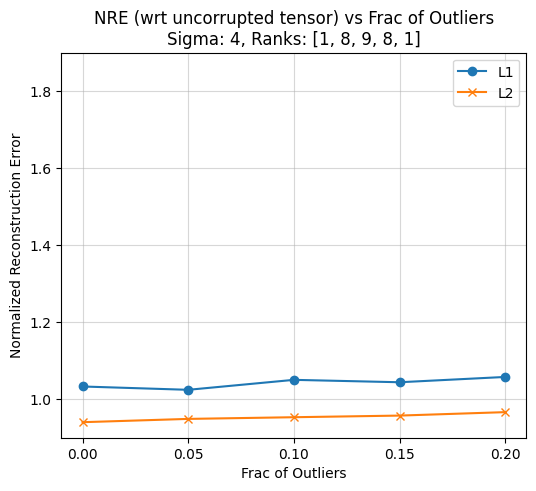

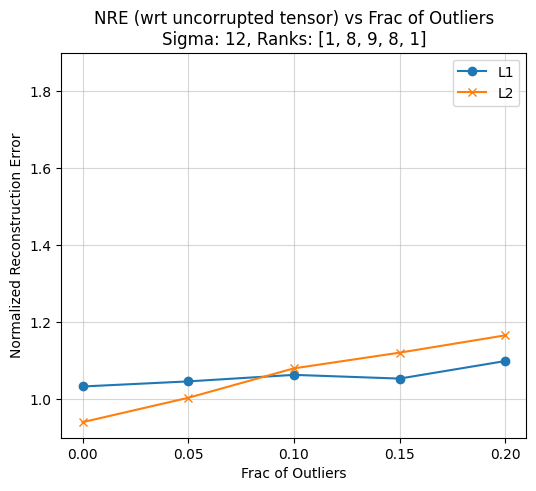

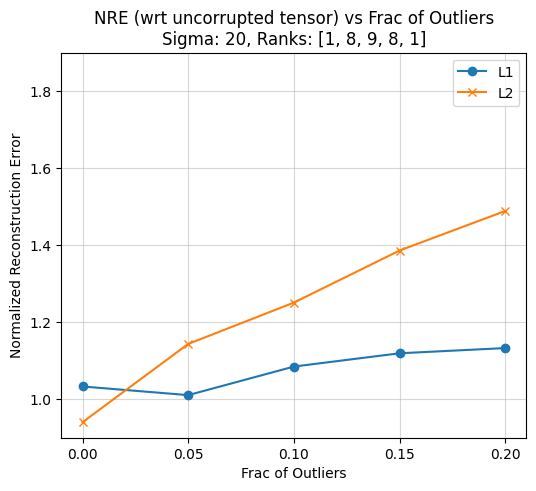

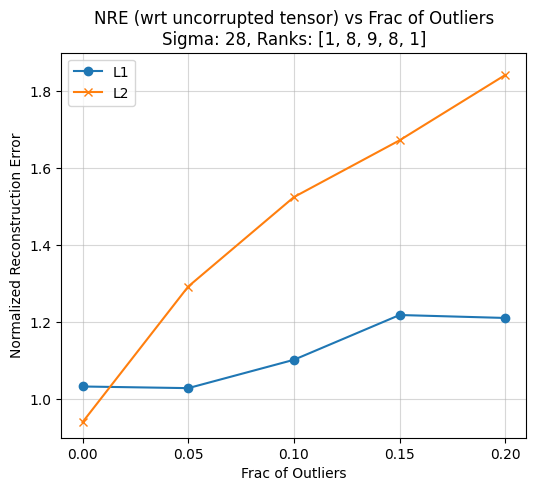

In [73]:
# NRE vs Number of Outliers for different sigmas
for i in range(len(sigmas)):
    plt.figure(figsize=(6, 5))
    plt.plot(df3[df3["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df3[df3["sigma"]==sigmas[i]]["nre_uncorr"], label = "L1", marker = 'o', linestyle = '-')
    plt.plot(df4[df4["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df4[df4["sigma"]==sigmas[i]]["nre_uncorr"], label = "L2", marker = 'x', linestyle = '-')
    plt.xlabel("Frac of Outliers")
    plt.ylabel("Normalized Reconstruction Error")
    plt.title("NRE (wrt uncorrupted tensor) vs Frac of Outliers\nSigma: " + str(sigmas[i]) + ", Ranks: " + str(r))
    plt.ylim(0.9, 1.9)
    plt.grid(alpha = 0.5)
    plt.xticks(f_num_out)
    plt.legend()

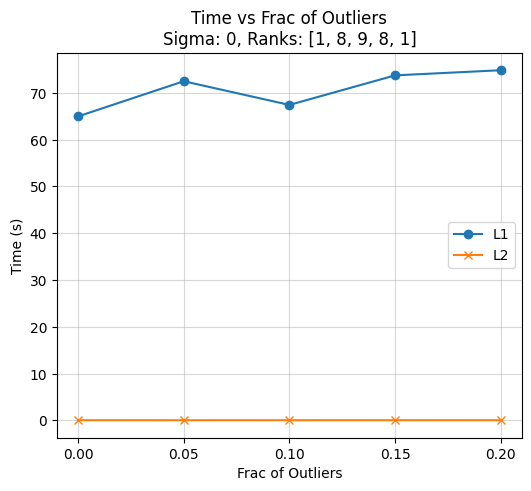

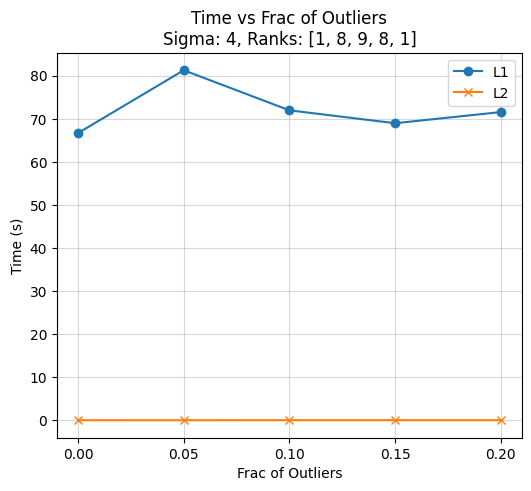

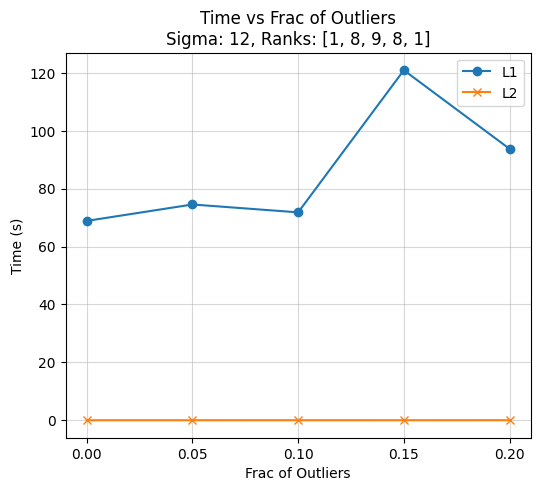

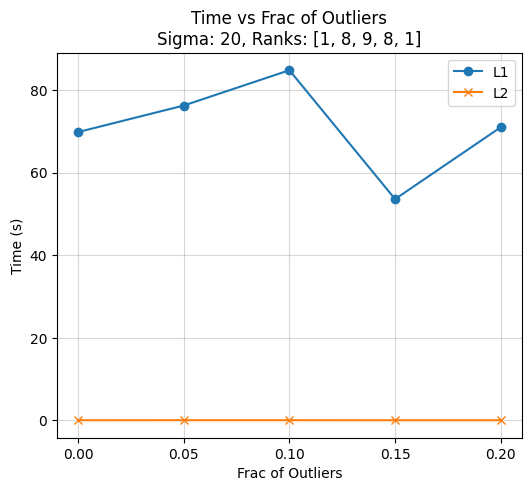

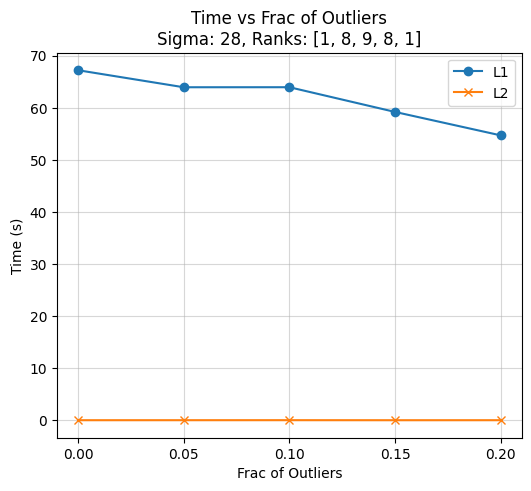

In [74]:
# time vs Number of Outliers for different sigmas
for i in range(len(sigmas)):
    plt.figure(figsize=(6, 5))
    plt.plot(df3[df3["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df3[df3["sigma"]==sigmas[i]]["time"], label = "L1", marker = 'o', linestyle = '-')
    plt.plot(df4[df4["sigma"]==sigmas[i]]["outliers"]/np.prod(size), df4[df4["sigma"]==sigmas[i]]["time"], label = "L2", marker = 'x', linestyle = '-')
    plt.xlabel("Frac of Outliers")
    plt.ylabel("Time (s)")
    plt.title("Time vs Frac of Outliers\nSigma: " + str(sigmas[i]) + ", Ranks: " + str(r))
    plt.grid(alpha = 0.5)
    plt.xticks(f_num_out)
    plt.legend()

In [81]:
df1 = pd.read_csv("L1_analysis_2.csv")
df2 = pd.read_csv("L2_analysis_2.csv")
df3 = pd.read_csv("L1_analysis_1.csv")
df4 = pd.read_csv("L2_analysis_1.csv")
df5 = pd.read_csv("L1_analysis_3.csv")
df6 = pd.read_csv("L2_analysis_3.csv")
nre_uncorr_low_low = [df1[(df1["outliers"]==2250) & (df1["sigma"]==12)]["nre_uncorr"].values[0], df2[(df2["outliers"]==2250) & (df2["sigma"]==12)]["nre_uncorr"].values[0], 
                df3[(df3["outliers"]==2250) & (df3["sigma"]==12)]["nre_uncorr"].values[0], df4[(df4["outliers"]==2250) & (df4["sigma"]==12)]["nre_uncorr"].values[0],
                df5[(df5["outliers"]==2250) & (df5["sigma"]==12)]["nre_uncorr"].values[0], df6[(df6["outliers"]==2250) & (df6["sigma"]==12)]["nre_uncorr"].values[0]]

nre_uncorr_low_high = [df1[(df1["outliers"]==2250) & (df1["sigma"]==28)]["nre_uncorr"].values[0], df2[(df2["outliers"]==2250) & (df2["sigma"]==28)]["nre_uncorr"].values[0],
                df3[(df3["outliers"]==2250) & (df3["sigma"]==28)]["nre_uncorr"].values[0], df4[(df4["outliers"]==2250) & (df4["sigma"]==28)]["nre_uncorr"].values[0],
                df5[(df5["outliers"]==2250) & (df5["sigma"]==28)]["nre_uncorr"].values[0], df6[(df6["outliers"]==2250) & (df6["sigma"]==28)]["nre_uncorr"].values[0]]

nre_uncorr_high_low = [df1[(df1["outliers"]==4500) & (df1["sigma"]==12)]["nre_uncorr"].values[0], df2[(df2["outliers"]==4500) & (df2["sigma"]==12)]["nre_uncorr"].values[0],
                df3[(df3["outliers"]==4500) & (df3["sigma"]==12)]["nre_uncorr"].values[0], df4[(df4["outliers"]==4500) & (df4["sigma"]==12)]["nre_uncorr"].values[0],
                df5[(df5["outliers"]==4500) & (df5["sigma"]==12)]["nre_uncorr"].values[0], df6[(df6["outliers"]==4500) & (df6["sigma"]==12)]["nre_uncorr"].values[0]]

nre_uncorr_high_high = [df1[(df1["outliers"]==4500) & (df1["sigma"]==28)]["nre_uncorr"].values[0], df2[(df2["outliers"]==4500) & (df2["sigma"]==28)]["nre_uncorr"].values[0],
                df3[(df3["outliers"]==4500) & (df3["sigma"]==28)]["nre_uncorr"].values[0], df4[(df4["outliers"]==4500) & (df4["sigma"]==28)]["nre_uncorr"].values[0],
                df5[(df5["outliers"]==4500) & (df5["sigma"]==28)]["nre_uncorr"].values[0], df6[(df6["outliers"]==4500) & (df6["sigma"]==28)]["nre_uncorr"].values[0]]


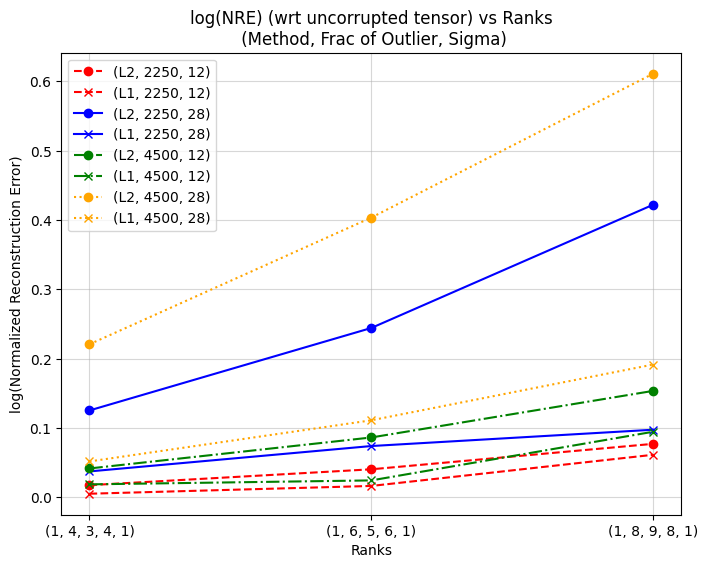

In [92]:
plt.figure(figsize=(8, 6))
plt.plot(np.log(nre_uncorr_low_low[1::2]), label = "(L2, 2250, 12)", marker = 'o', linestyle = '--', color = 'r')
plt.plot(np.log(nre_uncorr_low_low[::2]), label = "(L1, 2250, 12)", marker = 'x', linestyle = '--', color = 'r')

plt.plot(np.log(nre_uncorr_low_high[1::2]), label = "(L2, 2250, 28)", marker = 'o', linestyle = '-', color = 'b')
plt.plot(np.log(nre_uncorr_low_high[::2]), label = "(L1, 2250, 28)", marker = 'x', linestyle = '-', color = 'b')

plt.plot(np.log(nre_uncorr_high_low[1::2]), label = "(L2, 4500, 12)", marker = 'o', linestyle = '-.', color = 'g')
plt.plot(np.log(nre_uncorr_high_low[::2]), label = "(L1, 4500, 12)", marker = 'x', linestyle = '-.', color = 'g')

plt.plot(np.log(nre_uncorr_high_high[1::2]), label = "(L2, 4500, 28)", marker = 'o', linestyle = ':', color = 'orange')
plt.plot(np.log(nre_uncorr_high_high[::2]), label = "(L1, 4500, 28)", marker = 'x', linestyle = ':', color = 'orange')

plt.xlabel("Ranks")
plt.xticks([0, 1, 2], ["(1, 4, 3, 4, 1)", "(1, 6, 5, 6, 1)", "(1, 8, 9, 8, 1)"])
plt.ylabel("log(Normalized Reconstruction Error)")
plt.title("log(NRE) (wrt uncorrupted tensor) vs Ranks\n (Method, Frac of Outlier, Sigma)")
plt.grid(alpha = 0.5)
plt.legend()
plt.show()